# Improve the first forecasting model for redemptions. Use the Python code provided as a starting point.
<br> Fahim Faisal

## Model - RedemptionModel


In [6]:
# ensemble model for redemption
from EnsembleModelRedemption import EnsembleModelRedemption
# ensemble redemption core model for redemption
from Model import RedemptionModel

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Load data

In [7]:
def load_data(file):
    # generic data processing function
    df = pd.read_csv(file,
                dtype={'_id':int, 'Redemption Count': int, 'Sales Count':int},
                parse_dates=['Timestamp'])
    df.sort_values('Timestamp', inplace=True)
    
    # o values create problem for MAPE score 
    #df = df[df['Redemption Count'] > 0]
    #print(df[df['Redemption Count'] == 0].shape[0])
    
    # convert to time-aware
    df.set_index('Timestamp', inplace=True)
    df_daily = df.resample('d').sum()
    # engineer some time features 
    df_daily['monthly'] = df_daily.reset_index().Timestamp.dt.month.values
    df_daily['quarter'] = df_daily.reset_index().Timestamp.dt.quarter.values
    
    #added later
    df_daily['year']=df_daily.index.year
    # additional features 
    df_daily['dayofweek'] = df_daily.index.dayofweek
    df_daily['dayofyear'] = df_daily.index.dayofyear
    df_daily['dayofmonth'] = df_daily.index.day

    df_daily['weekofyear'] = df_daily.index.isocalendar().week.astype(int)


    # Season from month
    #df_daily['season'] = df_daily.index.month.map(month_to_season)
    
    
    #df_daily['season'] = LabelEncoder().fit_transform(df_daily['season'])
    # Lag features

 
        
    return df_daily

In [3]:
#         df['year']=df.index.year
#         df['dayofweek'] = df.index.dayofweek
#         df['dayofyear'] = df.index.dayofyear
#         df['month'] = df.index.month
#         df['weekofyear'] = df.index.isocalendar().week.astype(int)
        #df['season']=df.index.month.map(month_to_season)

## load data

In [8]:
df = load_data('./data/Toronto Island Ferry Ticket Counts.csv')

In [9]:
df.head()

_id  Redemption Count  Sales Count  monthly  quarter  year  \
Timestamp                                                                     
2015-05-01    985646                 1            4        5        2  2015   
2015-05-02         0                 0            0        5        2  2015   
2015-05-03         0                 0            0        5        2  2015   
2015-05-04   4681600                12           75        5        2  2015   
2015-05-05  11332905               537          549        5        2  2015   

            dayofweek  dayofyear  dayofmonth  weekofyear  
Timestamp                                                 
2015-05-01          4        121           1          18  
2015-05-02          5        122           2          18  
2015-05-03          6        123           3          18  
2015-05-04          0        124           4          19  
2015-05-05          1        125           5          19

In [10]:
df.columns

Index(['_id', 'Redemption Count', 'Sales Count', 'monthly', 'quarter', 'year',
       'dayofweek', 'dayofyear', 'dayofmonth', 'weekofyear'],
      dtype='object')

## Redemption Count by dayofmonth

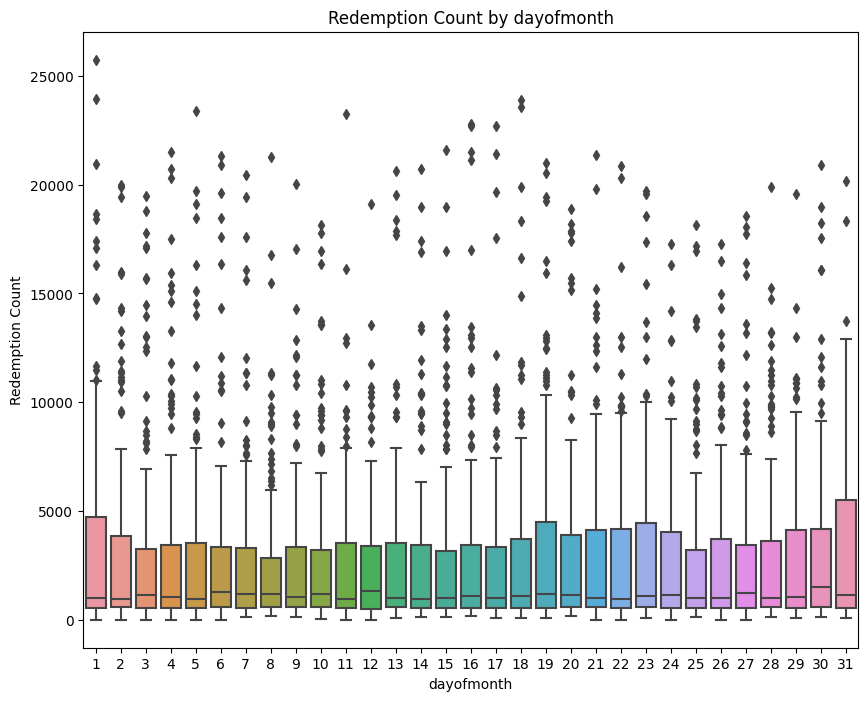

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='dayofmonth', y='Redemption Count')
ax.set_title('Redemption Count by dayofmonth')
plt.show()

## Redemption Count by monthly

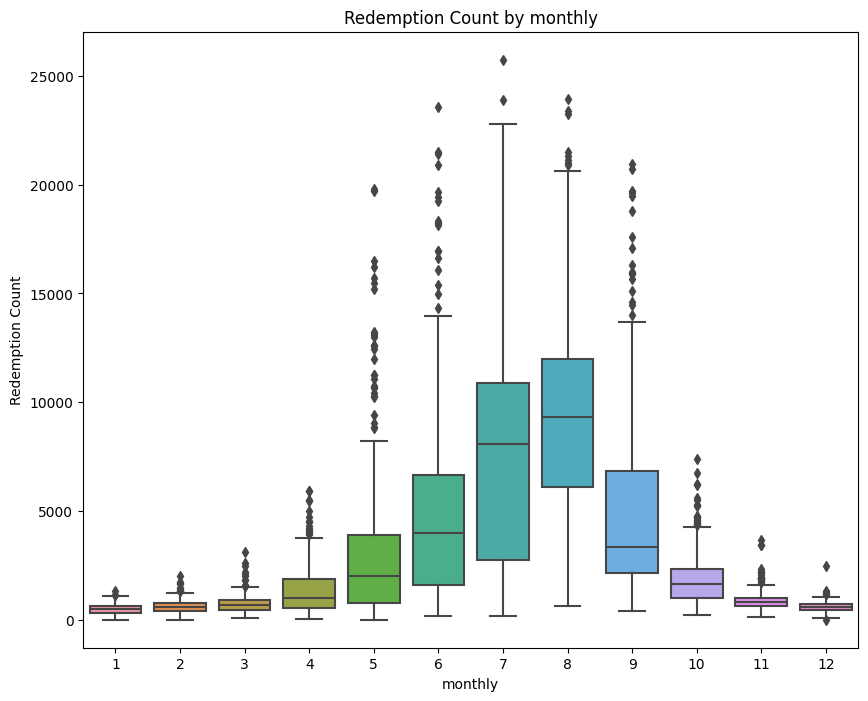

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='monthly', y='Redemption Count')
ax.set_title('Redemption Count by monthly')
plt.show()

## Redemption Count by quarter

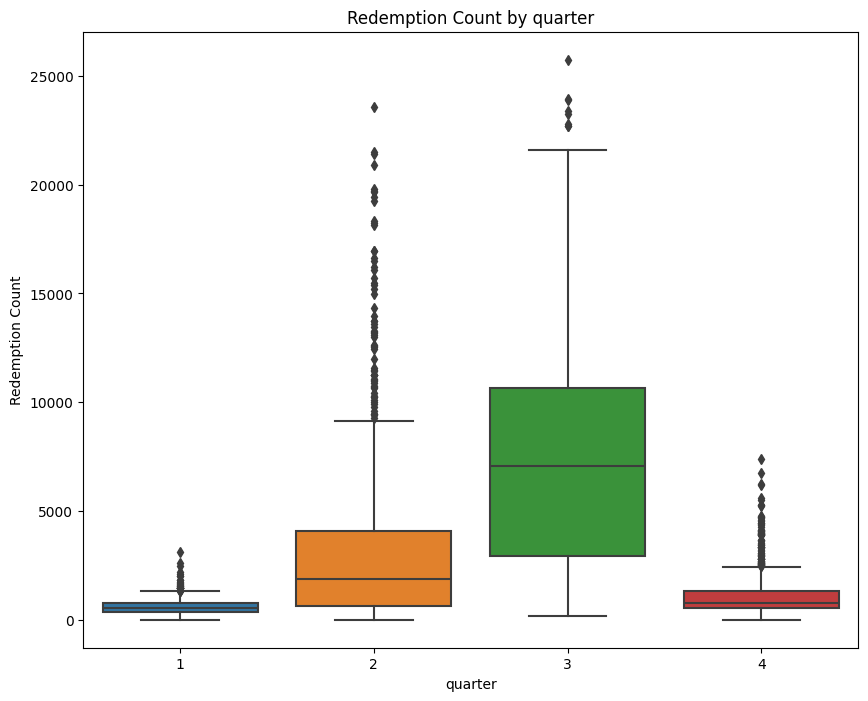

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='quarter', y='Redemption Count')
ax.set_title('Redemption Count by quarter')
plt.show()

## Redemption Count by Sales Count

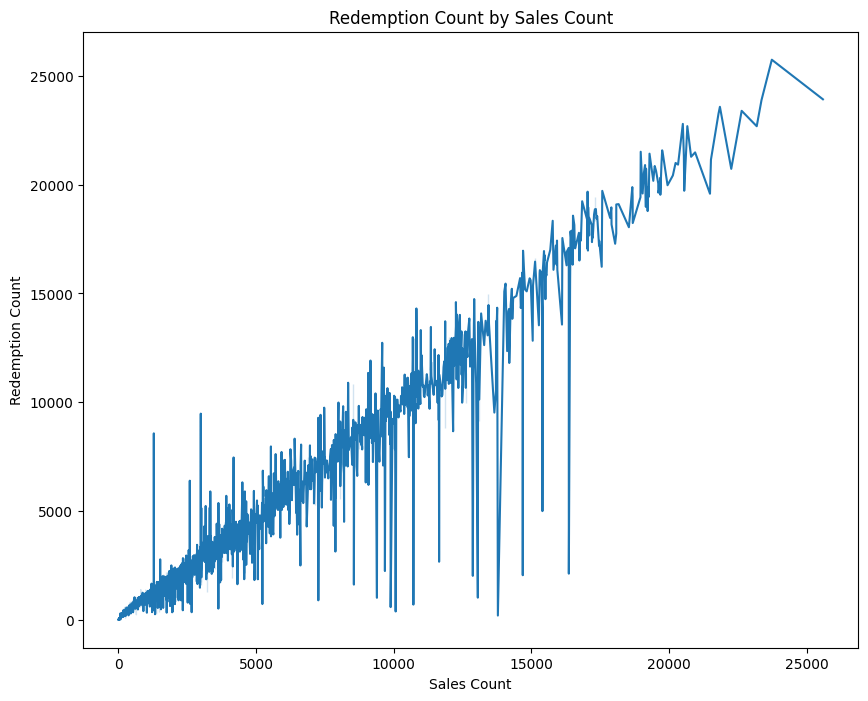

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=df, x='Sales Count', y='Redemption Count')
ax.set_title('Redemption Count by Sales Count')
plt.show()

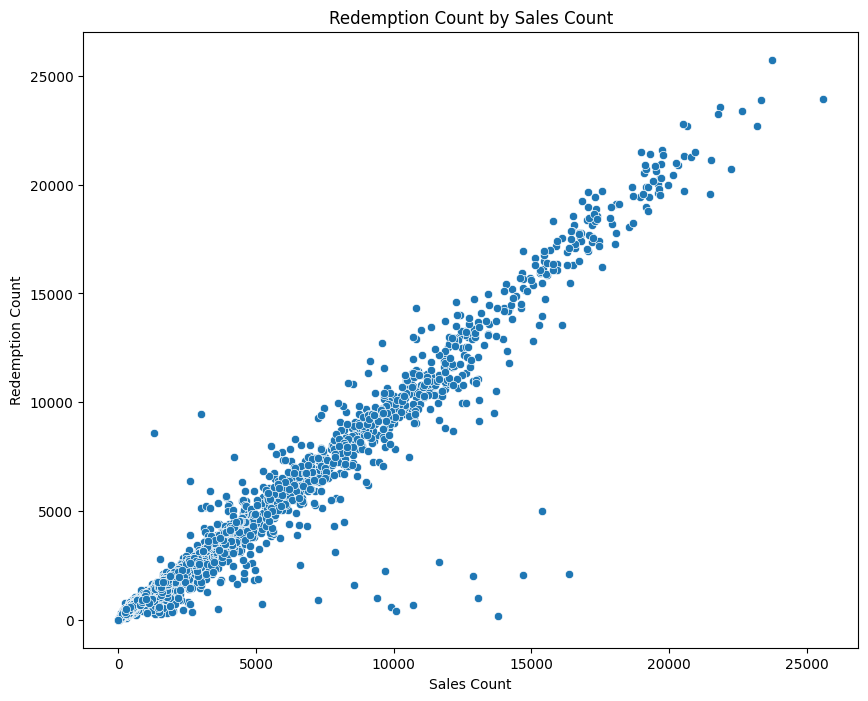

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=df, x='Sales Count', y='Redemption Count')

ax.set_title('Redemption Count by Sales Count')
plt.show()

## Redemption Count by dayofweek

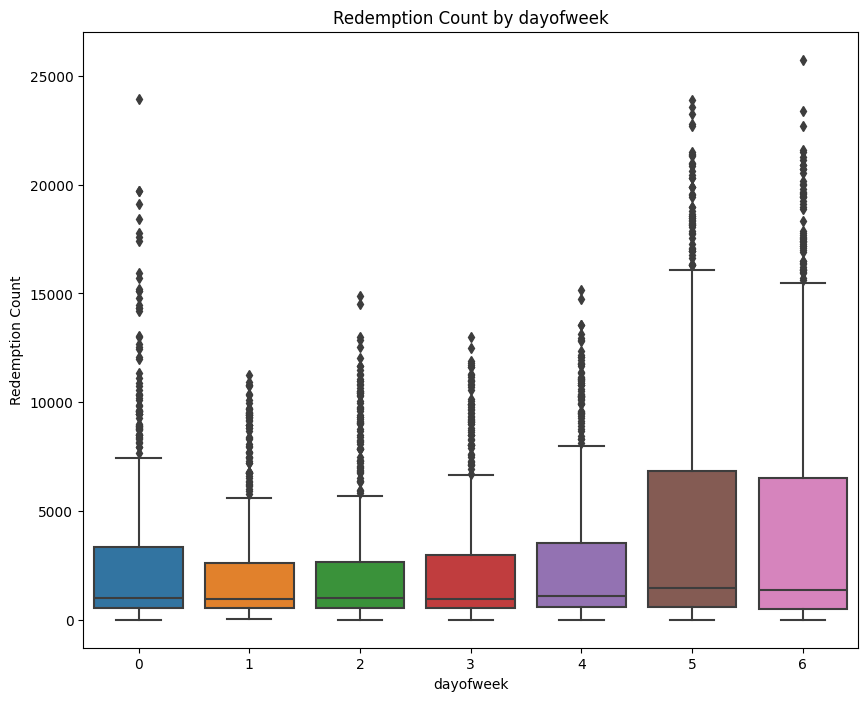

In [22]:

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='dayofweek', y='Redemption Count')
ax.set_title('Redemption Count by dayofweek')
plt.show()

## Redemption Count by dayofyear

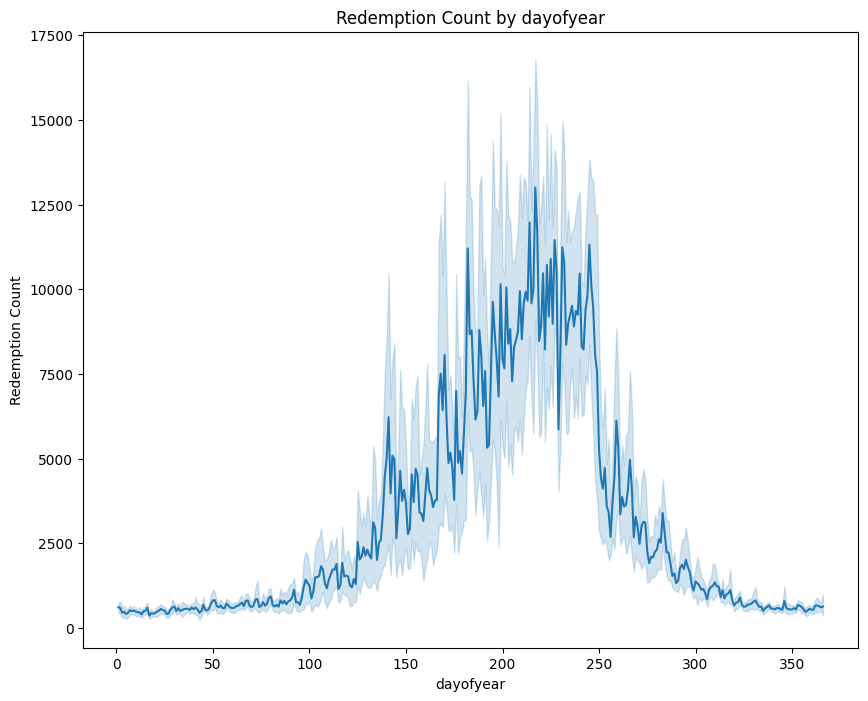

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=df, x='dayofyear', y='Redemption Count')
ax.set_title('Redemption Count by dayofyear')
plt.show()

## ACF  (Autocorrelation Function), PACF (Partial Autocorrelation Function) plot
The PACF plot shows the direct correlation at each lag, helping identify the order of autoregressive terms. <br>
shows the correlation between my series and its lags <br>
If pacf plot has a significant spike at lag P and not after that, and decay after that indicates (p,d,0) model.<br>
<hr>
The ACF plot reveals a decaying pattern, indicating a potential seasonality in the data. <br>
It shows the correlation after removing the effect of earlier lags.<br>
If acf plot has a major spike at lag q but not beyond and gradual decay after that suggest (0,d,q) model. <br>

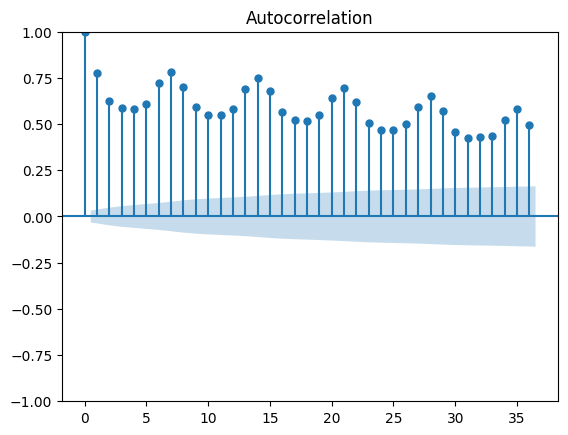

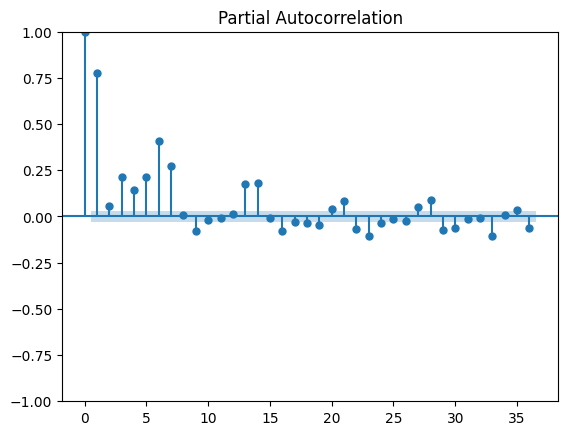

In [7]:


acf_original = plot_acf(df['Redemption Count'])

pacf_original = plot_pacf(df['Redemption Count'])

## We assume that the series is stationary based on the adf test

In [8]:

adf_test = adfuller(df['Redemption Count'])
print(f'p-value: {adf_test[1]}')

p-value: 0.00018102281679341706


# inspect yearly trend

0 occurrance in each year : 2015 2
0 occurrance in each year : 2016 0
0 occurrance in each year : 2017 0
0 occurrance in each year : 2018 4
0 occurrance in each year : 2019 0
0 occurrance in each year : 2020 0
0 occurrance in each year : 2021 2
0 occurrance in each year : 2022 3
0 occurrance in each year : 2023 0
0 occurrance in each year : 2024 0
0 occurrance in each year : 2025 2


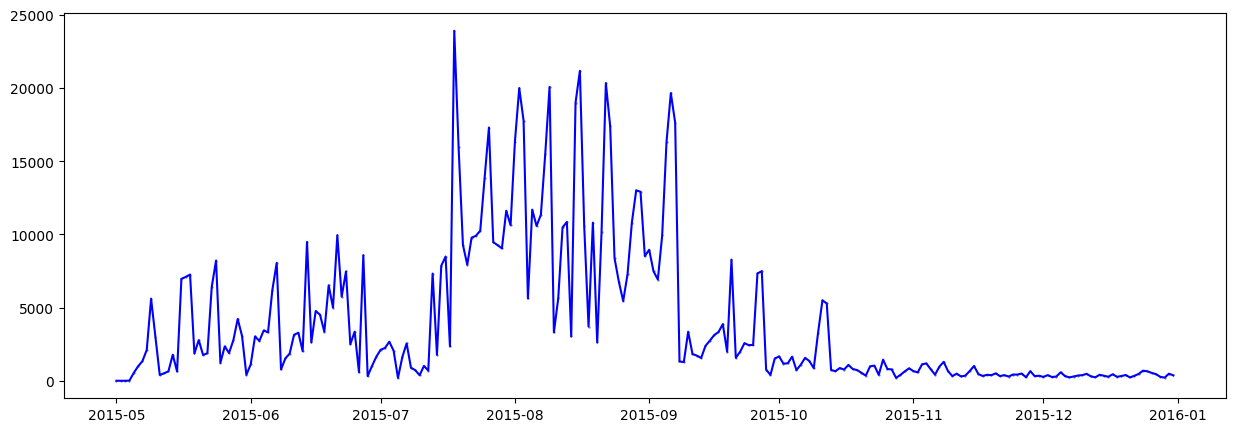

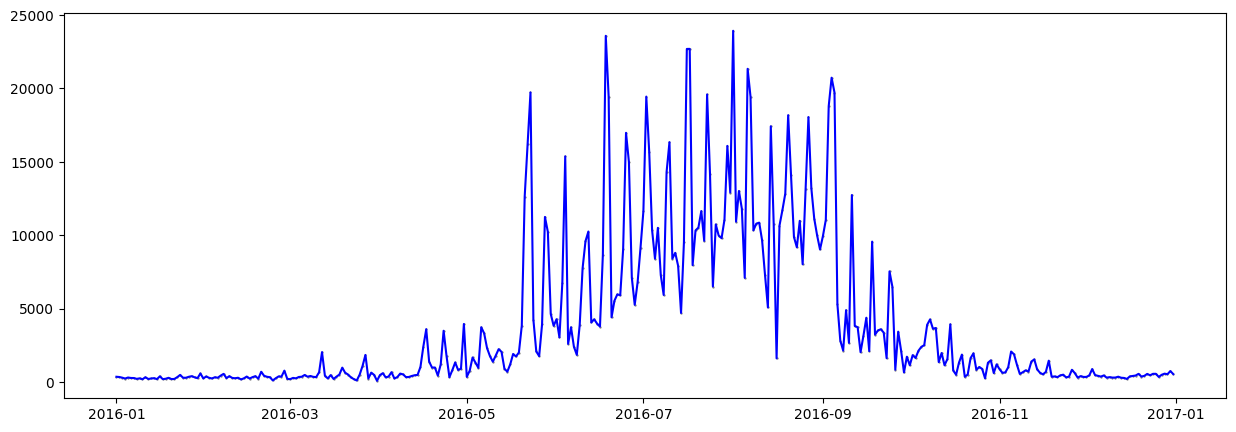

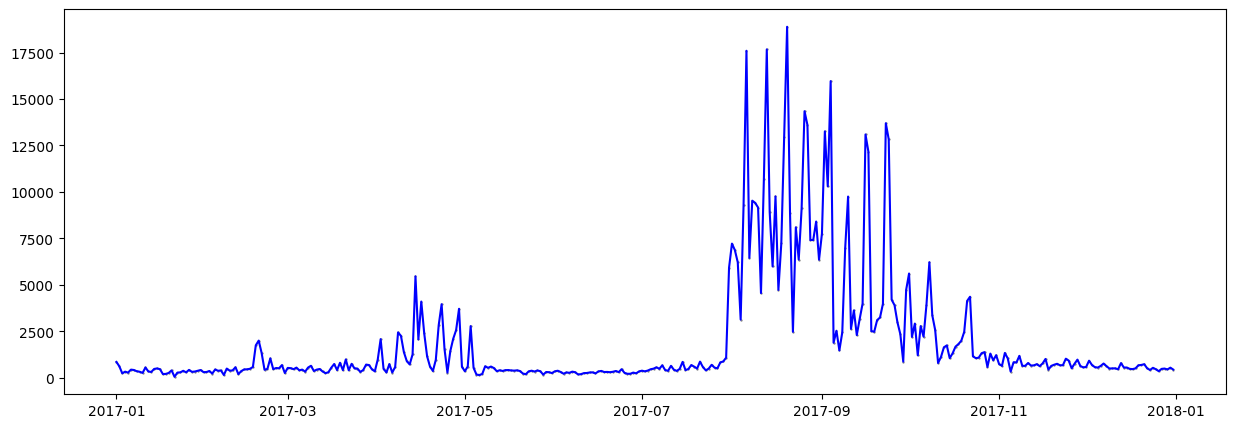

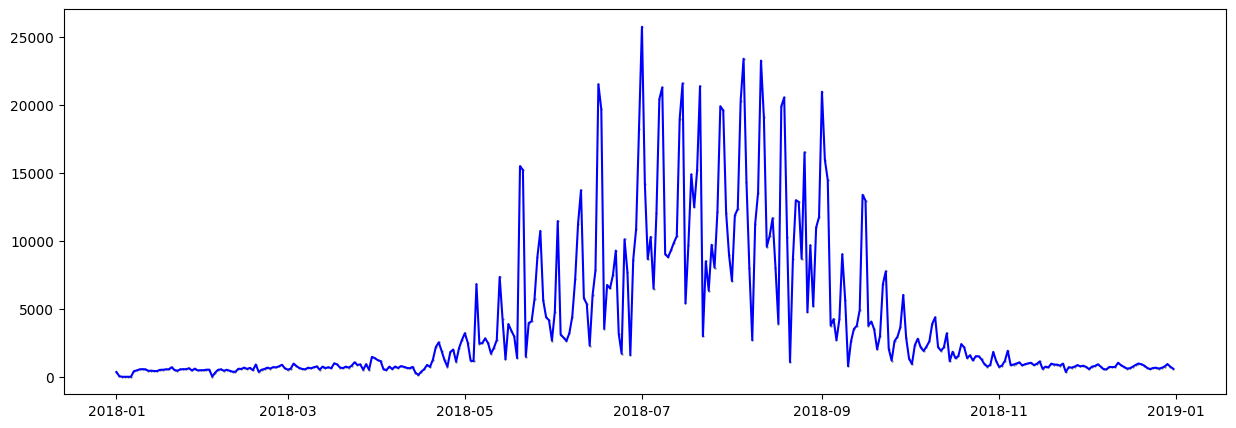

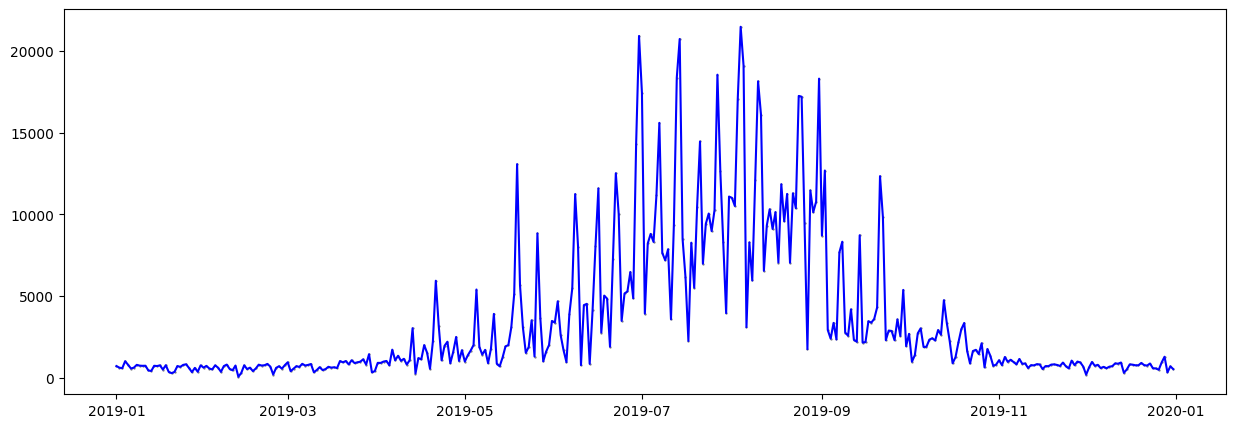

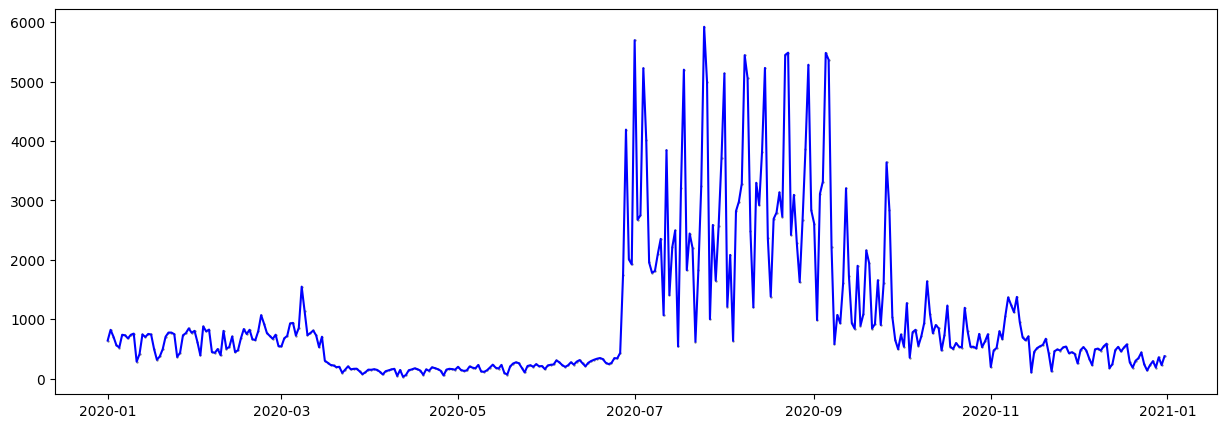

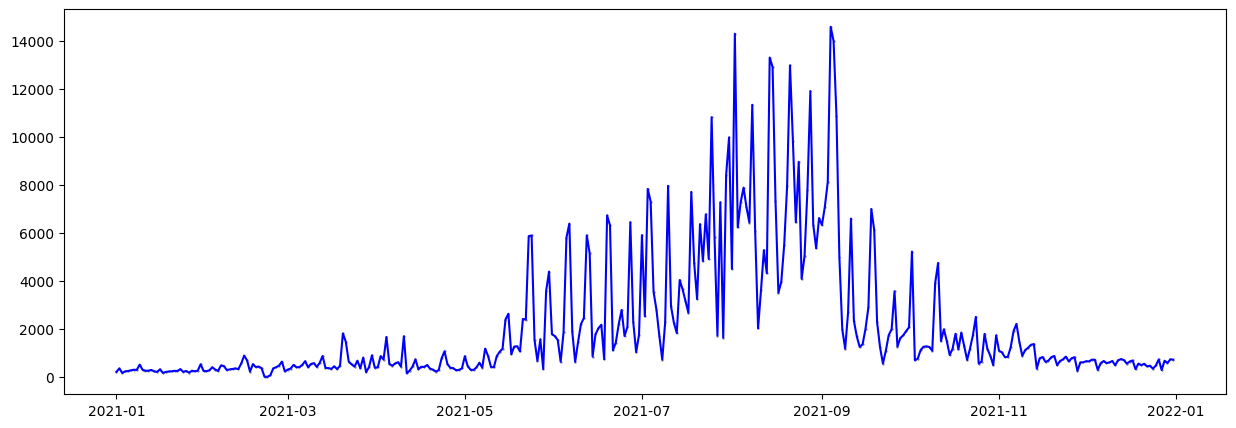

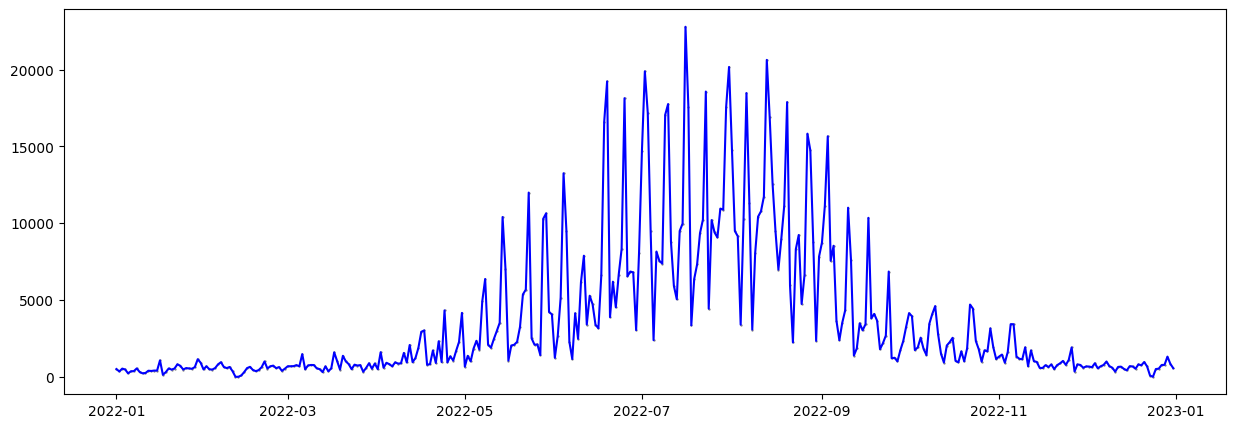

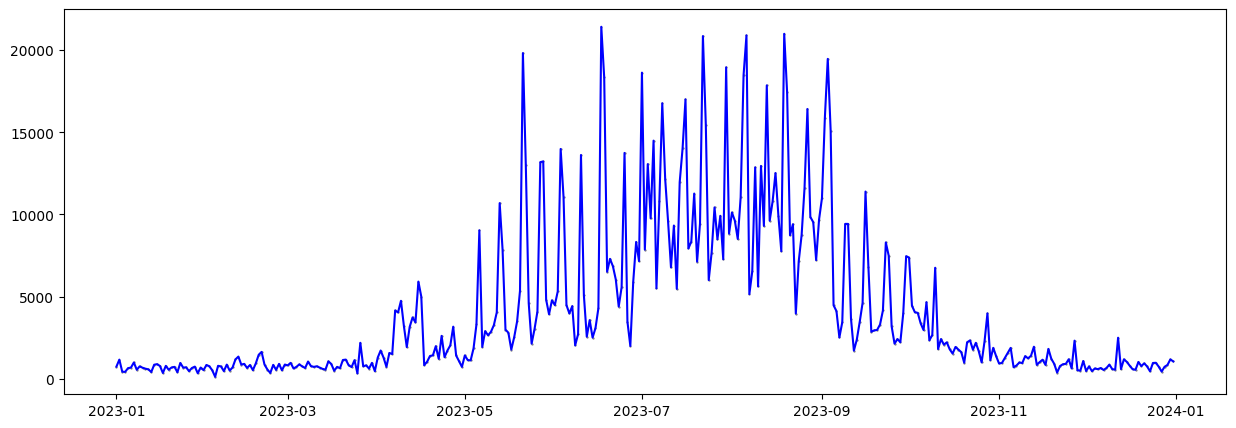

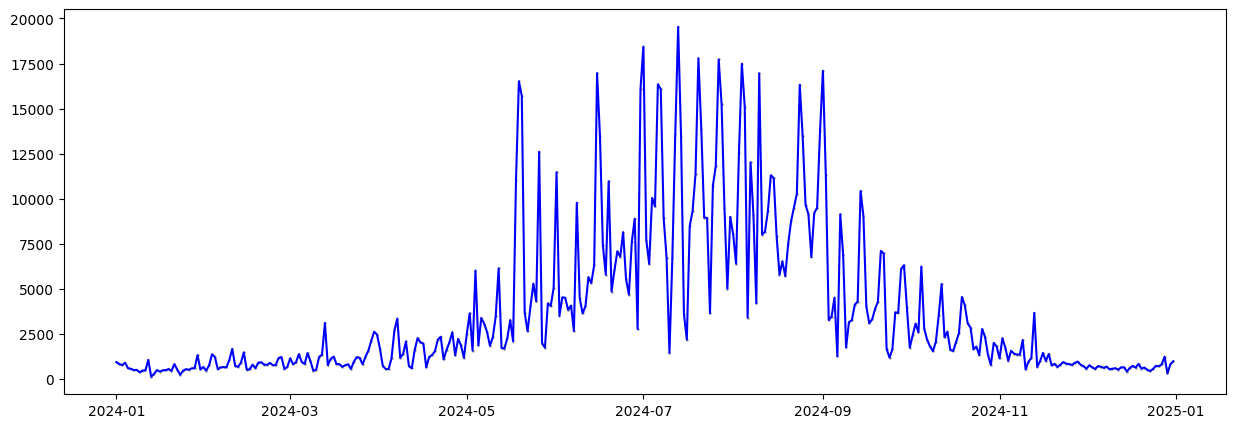

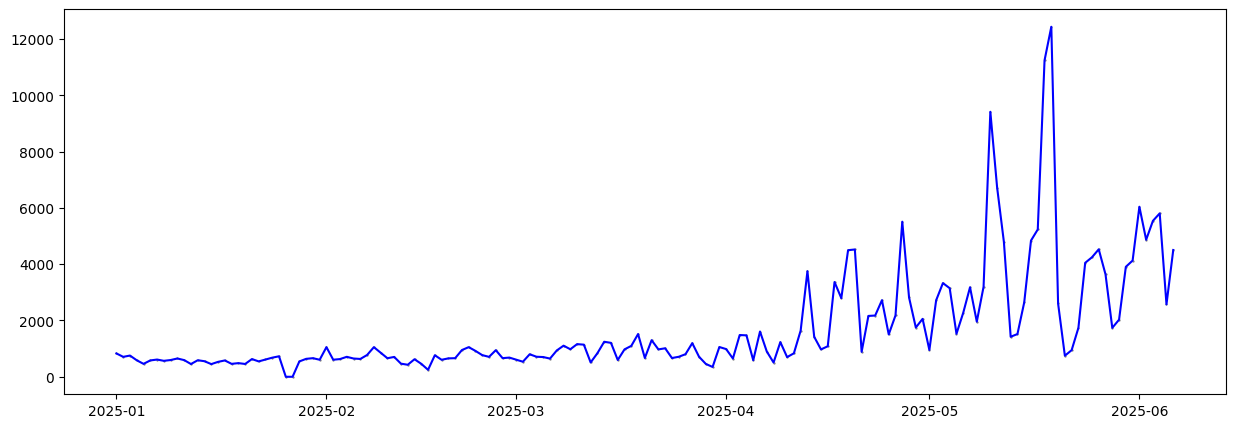

In [8]:
years=list(df['year'].unique())
for year in years:
    sub_df=df[df['year']==year]
    sub_df['year'].describe()
    print('0 occurrance in each year :',year,sub_df[sub_df['Redemption Count']==0].shape[0])
    fig, ax = plt.subplots(figsize=(15, 5))
    
    ax.scatter(sub_df.index, sub_df['Redemption Count'], s=0.4, color='grey',
            label='Observed')
    ax.plot(sub_df.index, sub_df['Redemption Count'].values, label='Scatters', color='blue')

### common seasonal spike in summer (7,8,9 months)

In [9]:
df.columns

Index(['_id', 'Redemption Count', 'Sales Count', 'monthly', 'quarter', 'year',
       'dayofweek', 'dayofyear', 'dayofmonth', 'weekofyear'],
      dtype='object')

In [10]:
df.describe()

_id  Redemption Count   Sales Count      monthly      quarter  \
count  3.690000e+03       3690.000000   3690.000000  3690.000000  3690.000000   
mean   8.227590e+06       3126.078320   3176.848509     6.508672     2.503252   
std    4.674464e+06       4337.610739   4338.948797     3.434877     1.112835   
min    0.000000e+00          0.000000      0.000000     1.000000     1.000000   
25%    4.276312e+06        557.250000    470.250000     4.000000     2.000000   
50%    8.470324e+06       1056.500000   1064.000000     6.000000     2.000000   
75%    1.170664e+07       3647.750000   3965.500000     9.000000     3.000000   
max    2.032078e+07      25748.000000  25585.000000    12.000000     4.000000   

              year    dayofweek    dayofyear   dayofmonth   weekofyear  
count  3690.000000  3690.000000  3690.000000  3690.000000  3690.000000  
mean   2019.880759     3.000271   182.707588    15.713821    26.543360  
std       2.941995     2.000068   105.034946     8.810215    15.009309  
min    2015.000000     0.000000     1.000000     1.000000     1.000000  
25%    2017.000000     1.000000    93.000000     8.000000    14.000000  
50%    2020.000000     3.000000   181.000000    16.000000    26.000000  
75%    2022.000000     5.000000   273.750000    23.000000    40.000000  
max    2025.000000     6.000000   366.000000    31.000000    53.000000

## completeness

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3690 entries, 2015-05-01 to 2025-06-06
Freq: D
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   _id               3690 non-null   int32
 1   Redemption Count  3690 non-null   int32
 2   Sales Count       3690 non-null   int32
 3   monthly           3690 non-null   int64
 4   quarter           3690 non-null   int64
 5   year              3690 non-null   int64
 6   dayofweek         3690 non-null   int64
 7   dayofyear         3690 non-null   int64
 8   dayofmonth        3690 non-null   int64
 9   weekofyear        3690 non-null   int32
dtypes: int32(4), int64(6)
memory usage: 259.5 KB


In [3]:
# df.groupby(['_id']).size()

In [12]:
df

_id  Redemption Count  Sales Count  monthly  quarter  year  \
Timestamp                                                                     
2015-05-01    985646                 1            4        5        2  2015   
2015-05-02         0                 0            0        5        2  2015   
2015-05-03         0                 0            0        5        2  2015   
2015-05-04   4681600                12           75        5        2  2015   
2015-05-05  11332905               537          549        5        2  2015   
...              ...               ...          ...      ...      ...   ...   
2025-06-02     25517              4869         5409        6        2  2025   
2025-06-03     19480              5541         5503        6        2  2025   
2025-06-04     13080              5806         5423        6        2  2025   
2025-06-05      6401              2573         2919        6        2  2025   
2025-06-06      1225              4505         4269        6        2  2025   

            dayofweek  dayofyear  dayofmonth  weekofyear  
Timestamp                                                 
2015-05-01          4        121           1          18  
2015-05-02          5        122           2          18  
2015-05-03          6        123           3          18  
2015-05-04          0        124           4          19  
2015-05-05          1        125           5          19  
...               ...        ...         ...         ...  
2025-06-02          0        153           2          23  
2025-06-03          1        154           3          23  
2025-06-04          2        155           4          23  
2025-06-05          3        156           5          23  
2025-06-06          4        157           6          23  

[3690 rows x 10 columns]

ymd

## min and max year

In [13]:
print(min(df.index))
print(max(df.index))

2015-05-01 00:00:00
2025-06-06 00:00:00


## inspect trends

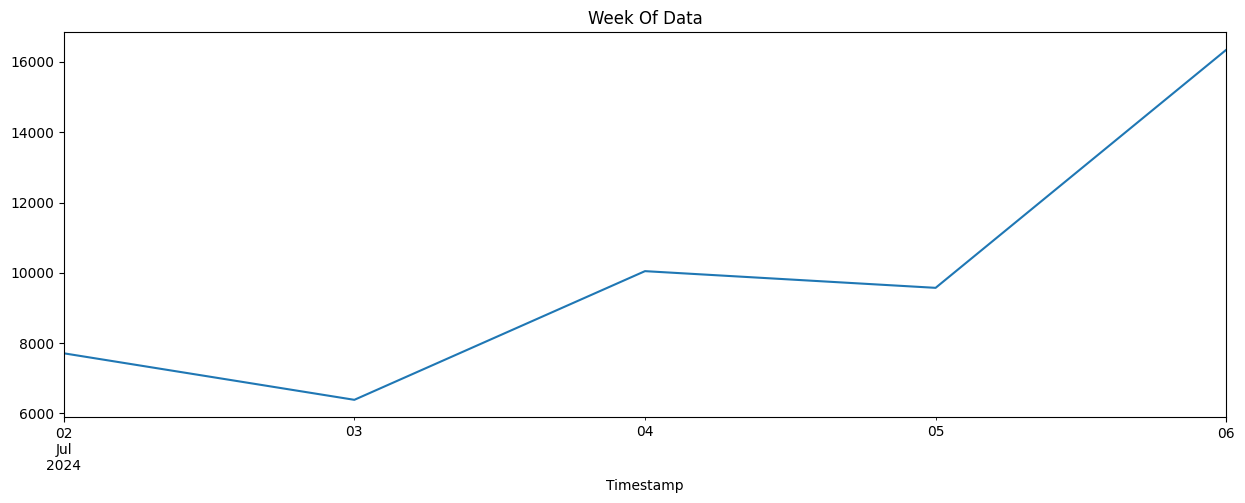

In [14]:
df['Redemption Count'].loc[(df.index > '2024-07-01') & (df.index < '2024-07-07')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

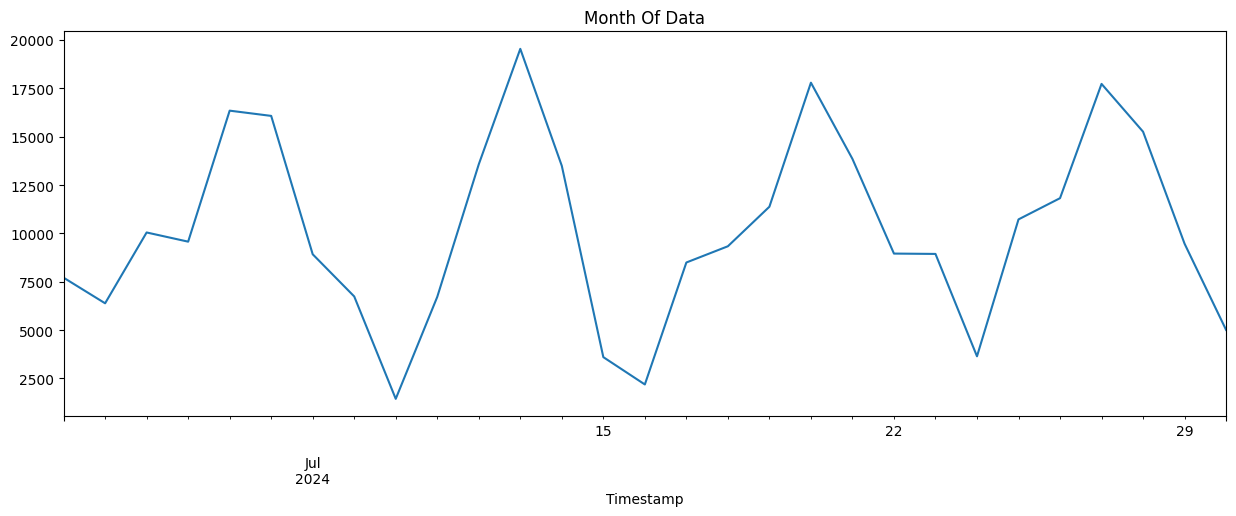

In [15]:
df['Redemption Count'].loc[(df.index > '2024-07-01') & (df.index < '2024-07-31')] \
    .plot(figsize=(15, 5), title='Month Of Data')
plt.show()

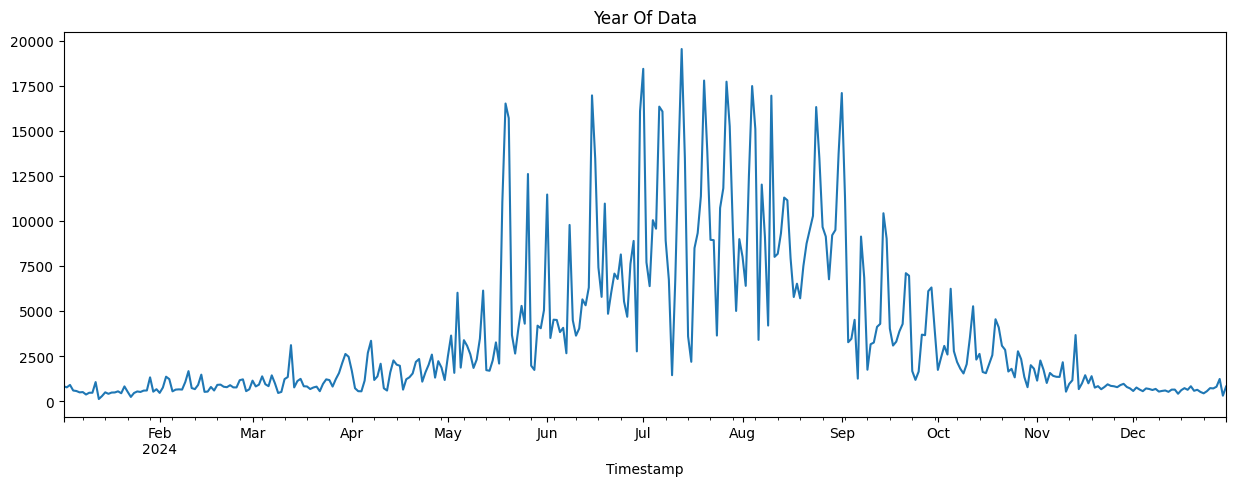

In [16]:
df['Redemption Count'].loc[(df.index > '2024-01-01') & (df.index < '2024-12-31')] \
    .plot(figsize=(15, 5), title='Year Of Data')
plt.show()

# covid time is different

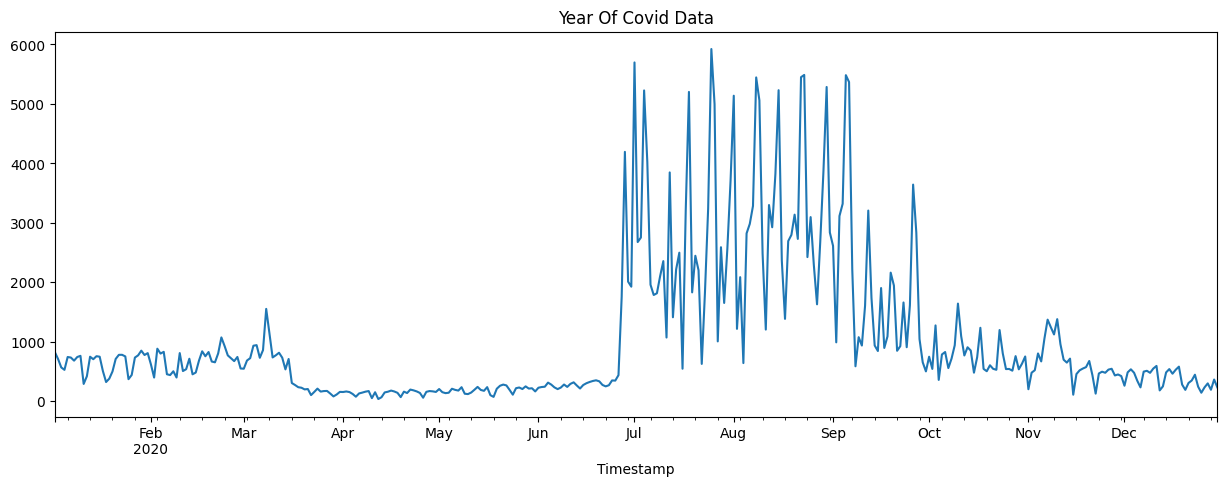

In [17]:
df['Redemption Count'].loc[(df.index > '2020-01-01') & (df.index < '2020-12-31')] \
    .plot(figsize=(15, 5), title='Year Of Covid Data')
plt.show()

## Outlier detection

In [12]:


def detect_outliers(series, period=365, threshold=3):
    """
    Detect outliers using seasonal decomposition residuals where period is annual - 365 and threshold is 3 times SD for outlier.
    returns true/false mask aand res
    """
    # Decompose the series
    res = seasonal_decompose(series, period=period, extrapolate_trend='freq', model='additive')
    resid = res.resid.dropna()
    # Outlier detection threshold
    std = resid.std()
    outlier_mask = resid.abs() > (threshold * std)
    outlier_residuals = resid[outlier_mask]
    return outlier_mask, outlier_residuals


In [13]:
outlier_mask, outlier_residuals = detect_outliers(df['Redemption Count'])
print("Number of outliers detected:", outlier_mask.sum())
print("Outlier dates:\n", outlier_residuals.index)

Number of outliers detected: 94
Outlier dates:
 DatetimeIndex(['2015-07-18', '2015-07-26', '2015-08-02', '2015-08-09',
               '2015-08-16', '2015-08-22', '2015-08-23', '2015-09-06',
               '2015-09-07', '2016-05-22', '2016-05-23', '2016-06-04',
               '2016-06-18', '2016-06-19', '2016-06-25', '2016-07-02',
               '2016-07-16', '2016-07-17', '2016-07-23', '2016-08-01',
               '2016-08-16', '2016-08-27', '2016-09-04', '2016-09-05',
               '2017-07-02', '2017-07-17', '2017-07-23', '2017-08-13',
               '2017-08-20', '2017-09-16', '2017-09-23', '2017-09-24',
               '2018-05-20', '2018-06-10', '2018-06-16', '2018-06-17',
               '2018-06-30', '2018-07-01', '2018-07-07', '2018-07-08',
               '2018-07-14', '2018-07-15', '2018-07-21', '2018-07-28',
               '2018-07-29', '2018-08-04', '2018-08-05', '2018-08-11',
               '2018-08-12', '2018-08-18', '2018-08-19', '2018-08-21',
               '2018-09-01', 

## Outliers removal

In [14]:
# stat of outliers 
df[outlier_mask]['Redemption Count'].describe()

count       94.000000
mean     17048.031915
std       5916.297597
min        345.000000
25%      16387.000000
50%      18565.500000
75%      20400.000000
max      25748.000000
Name: Redemption Count, dtype: float64

In [15]:
 df[outlier_mask]['Redemption Count'].index.year.unique(0)

Int64Index([2015, 2016, 2017, 2018, 2019, 2021, 2022, 2023, 2024], dtype='int64', name='Timestamp')

In [16]:
# stat of reg data
df['Redemption Count'].describe()

count     3690.000000
mean      3126.078320
std       4337.610739
min          0.000000
25%        557.250000
50%       1056.500000
75%       3647.750000
max      25748.000000
Name: Redemption Count, dtype: float64

## replace outliers by interpolation 

In [17]:
df['Redemption Count'] = np.where(outlier_mask, np.nan, df['Redemption Count'])
df['Redemption Count'] = df['Redemption Count'].interpolate()  # linear fill


# Train

val shape (2595, 11) (365, 11)
15029949.612269597
Base 0.8645900694437079


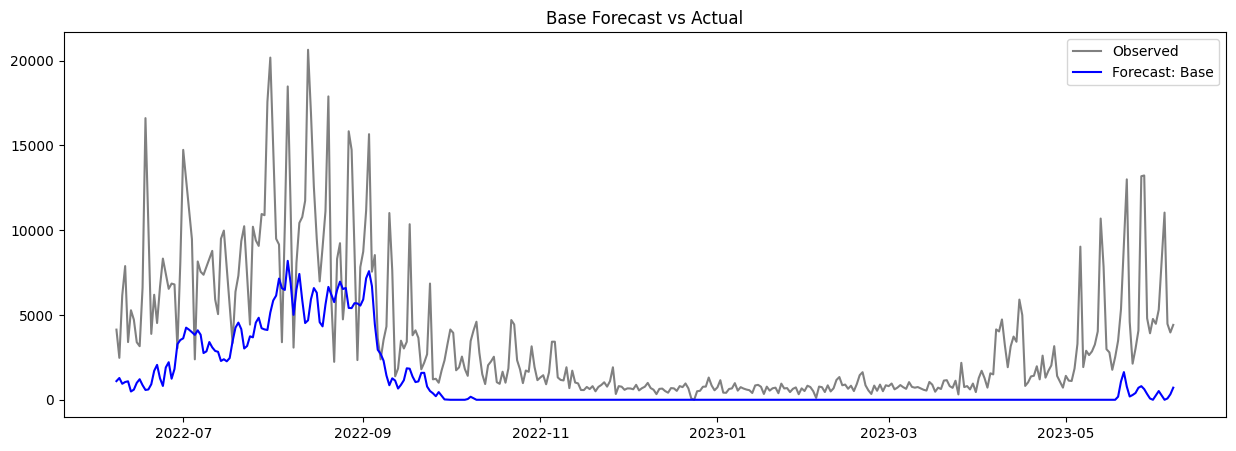

17673275.032648835
ARIMA 3.082557446593088


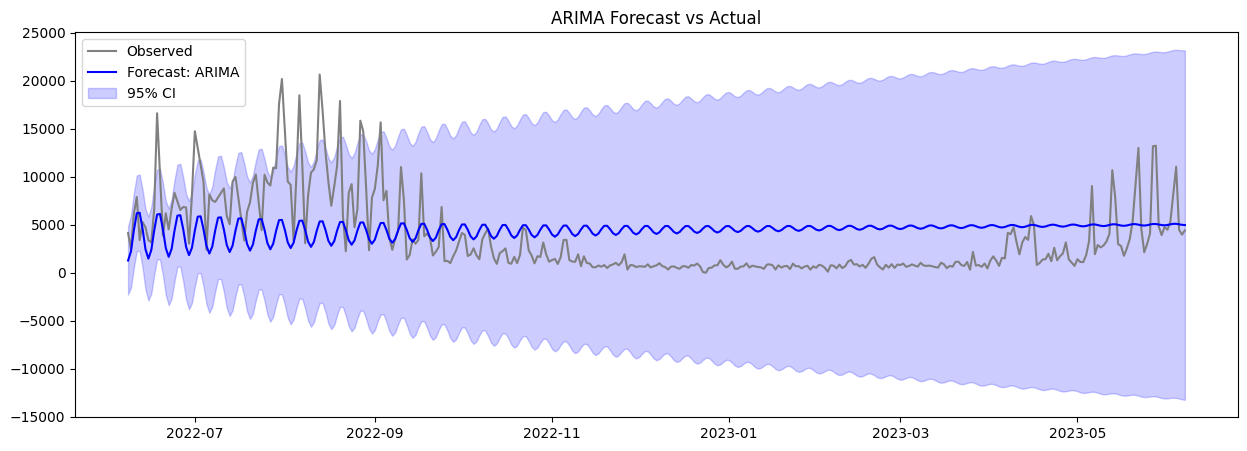

7211577.176944032
ETS 1.4189199154850067


G:\Users\Fahim\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


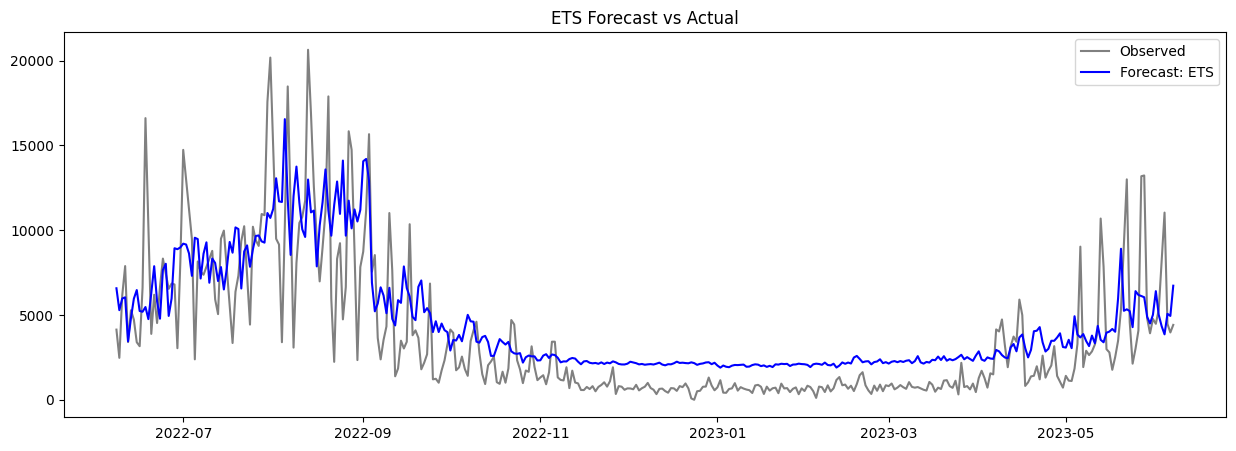

29817709.609376244
seasonal smoothing 0.9994421296398169


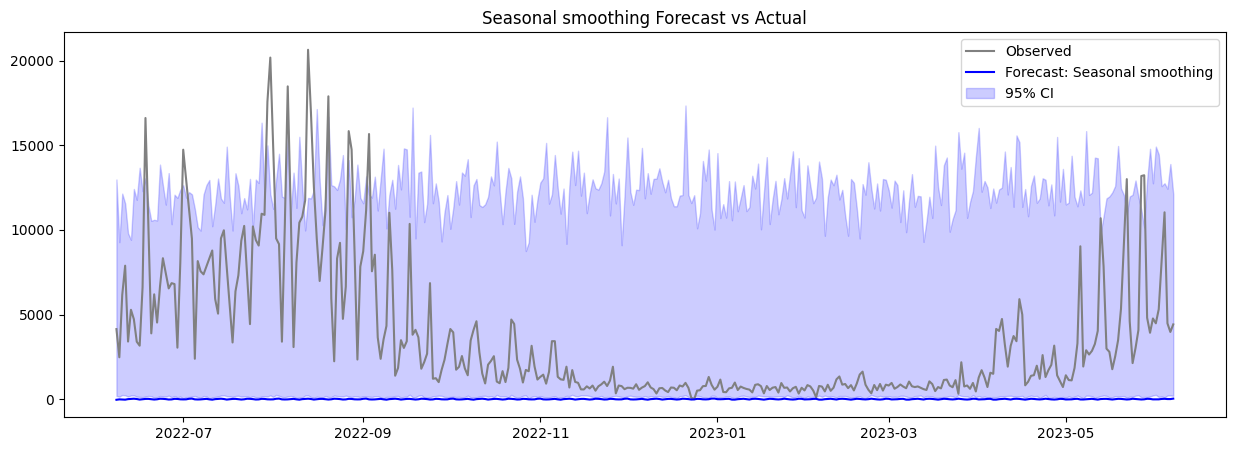

23:03:03 - cmdstanpy - INFO - Chain [1] start processing
23:03:03 - cmdstanpy - INFO - Chain [1] done processing


5483330.356696965
Prophet Season Holiday 0.9606301470090972


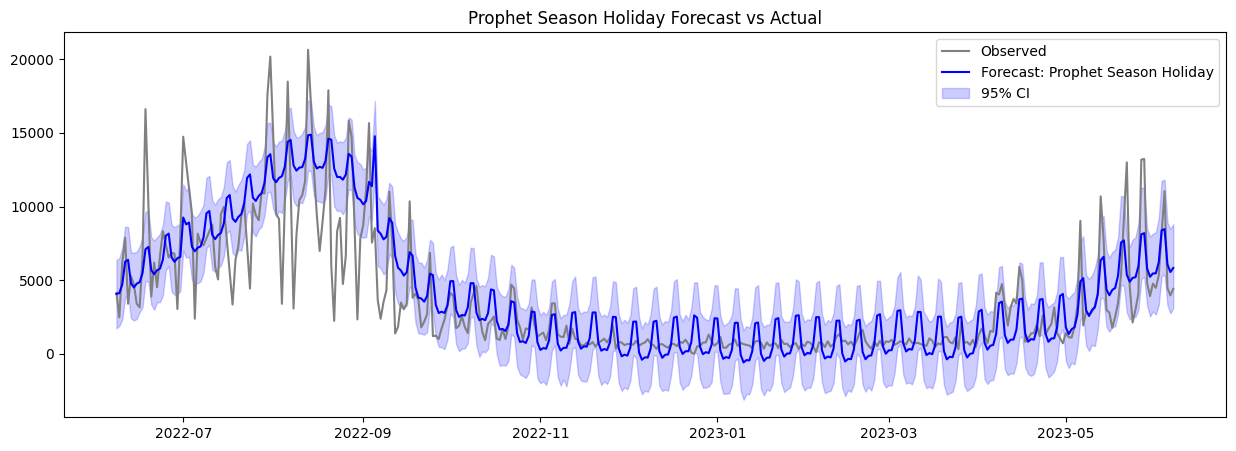

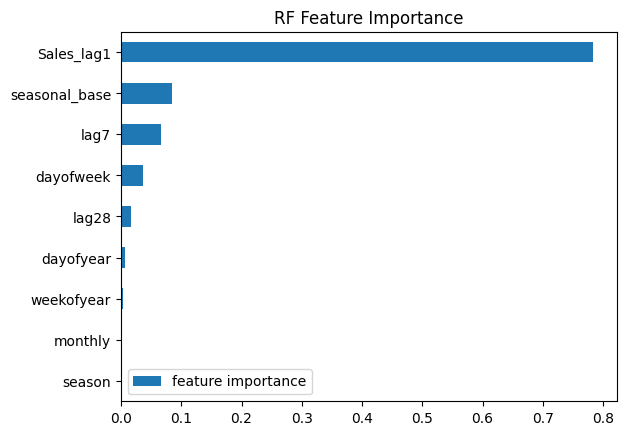

4744886.176053262
RF 0.4202708771236588


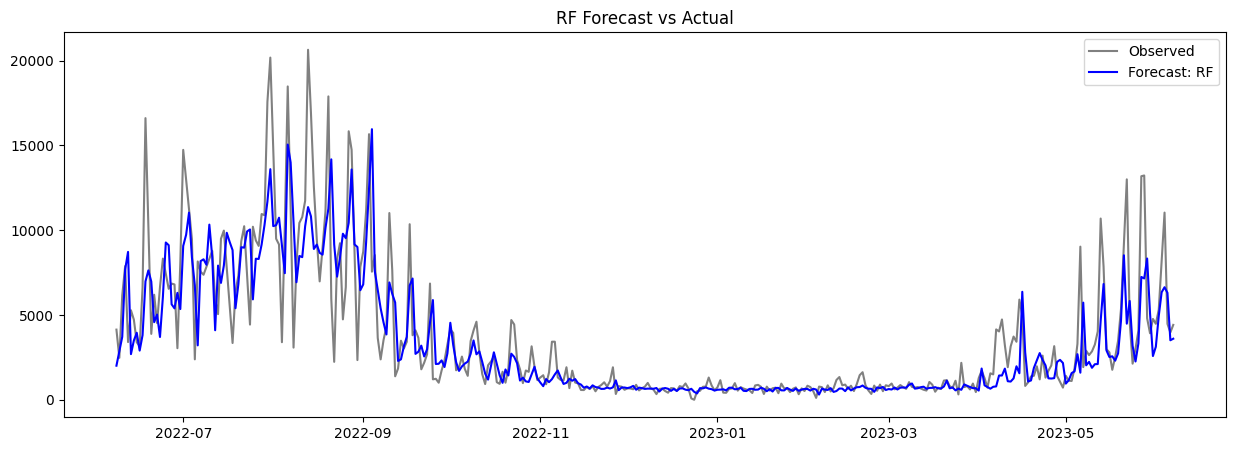

Index(['Sales_lag1', 'dayofweek', 'dayofyear', 'monthly', 'season',
       'weekofyear', 'seasonal_base', 'lag7', 'lag14', 'lag28', 'lag56',
       'lag_year'],
      dtype='object')


G:\Users\Fahim\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:03:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


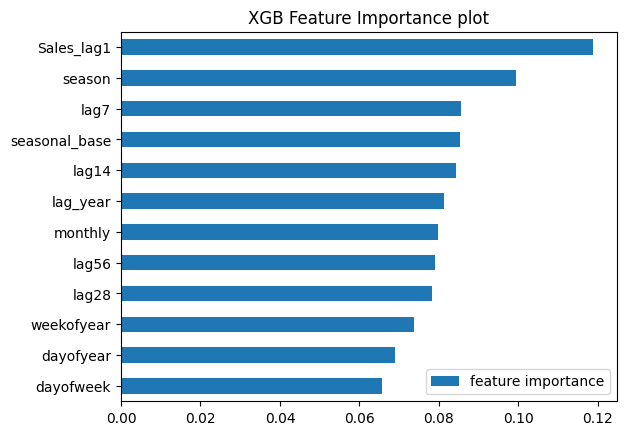

4647688.892908209
XGB 0.41555763260377077


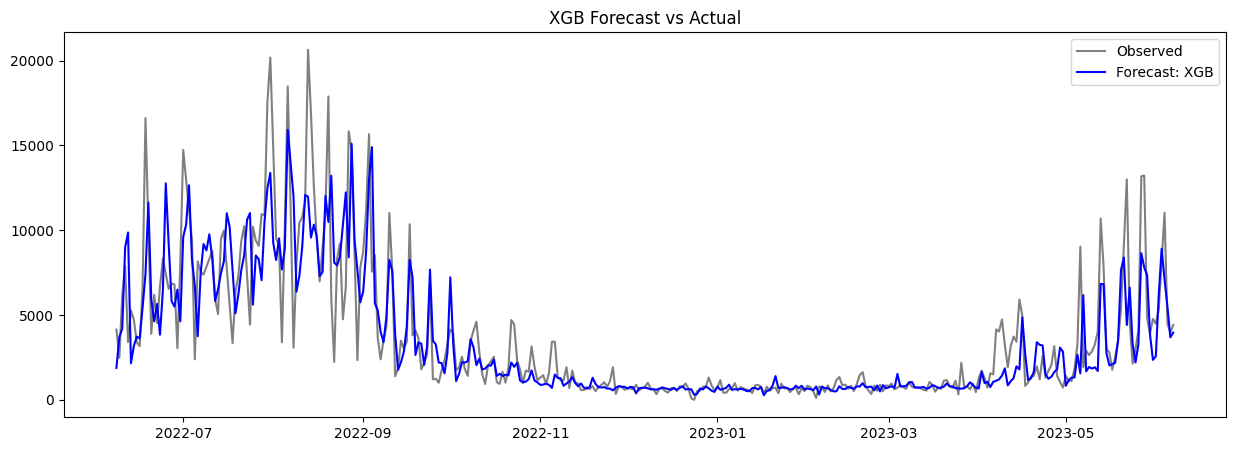

Index(['Sales_lag1', 'dayofweek', 'dayofyear', 'monthly', 'season',
       'weekofyear', 'seasonal_base', 'lag3', 'lag7', 'lag28'],
      dtype='object')
4576168.794103585
LGBM 0.41194757358325496


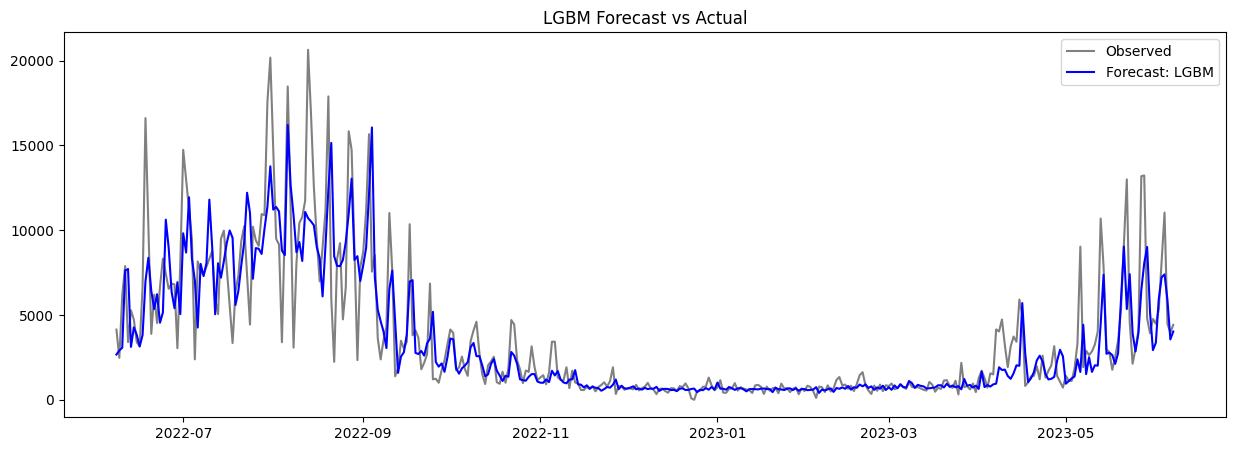

Index(['Sales_lag1', 'dayofweek', 'dayofyear', 'monthly', 'season',
       'weekofyear', 'seasonal_base', 'lag3', 'lag7', 'lag14', 'lag28',
       'lag30', 'lag56'],
      dtype='object')


G:\Users\Fahim\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:03:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


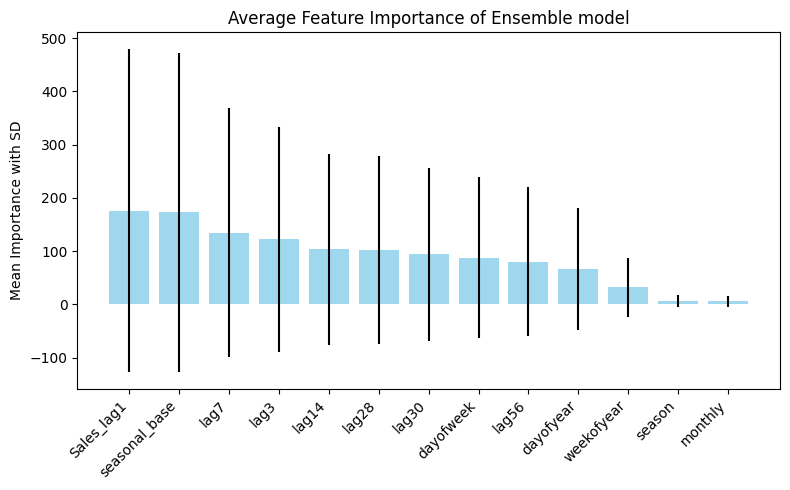

4555581.366125147
Ensemble model 0.3997744138034158


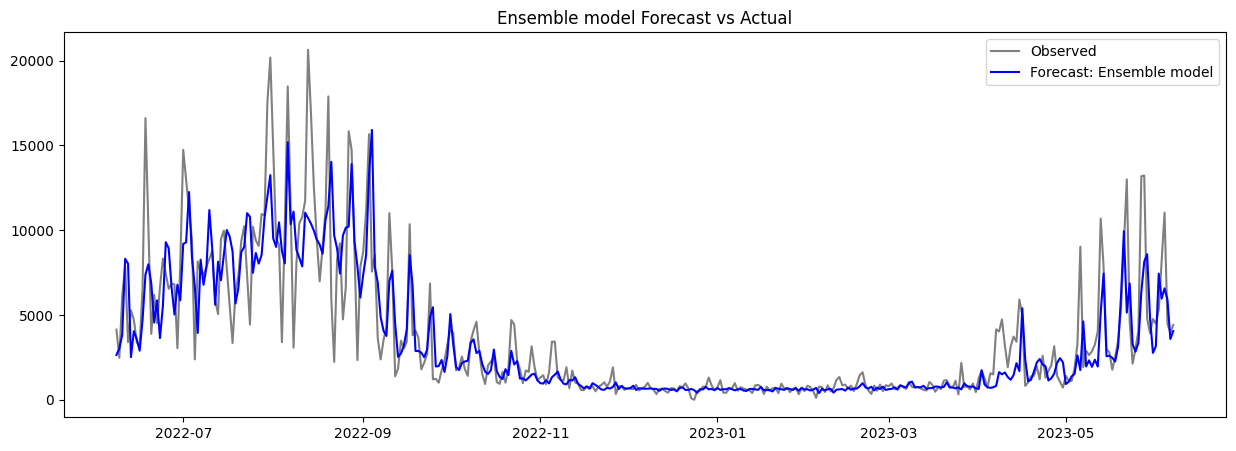

val shape (2960, 11) (365, 11)
15627141.248762535
Base 0.8597226890214185


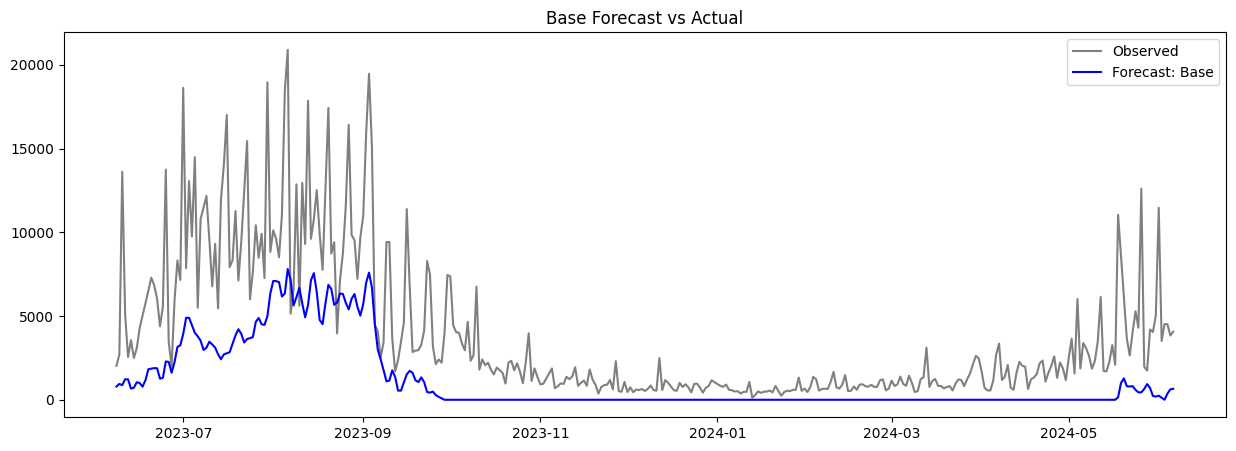

19135061.700331815
ARIMA 0.9116165938645038


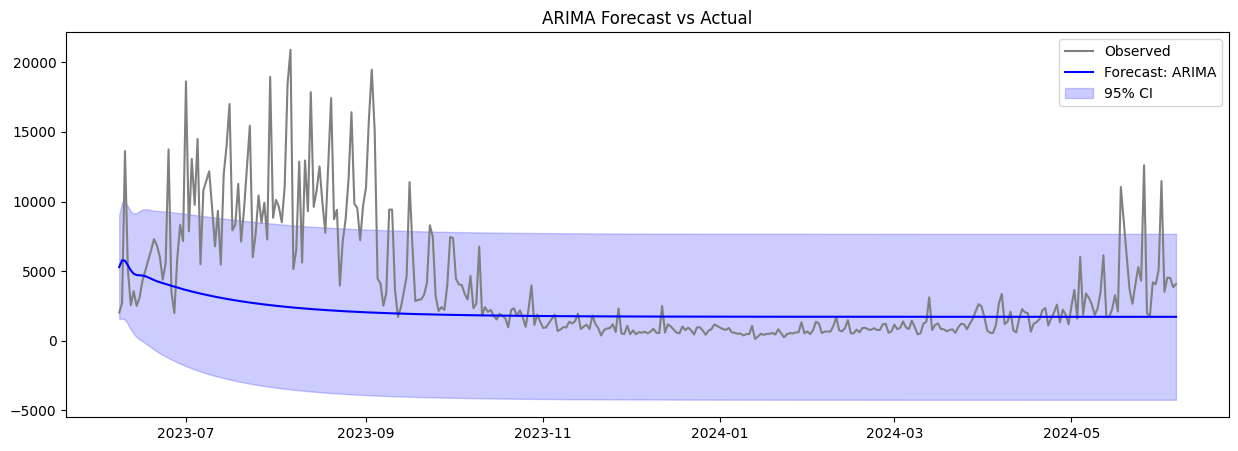

9567228.865547415
ETS 2.2534461450680707


G:\Users\Fahim\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


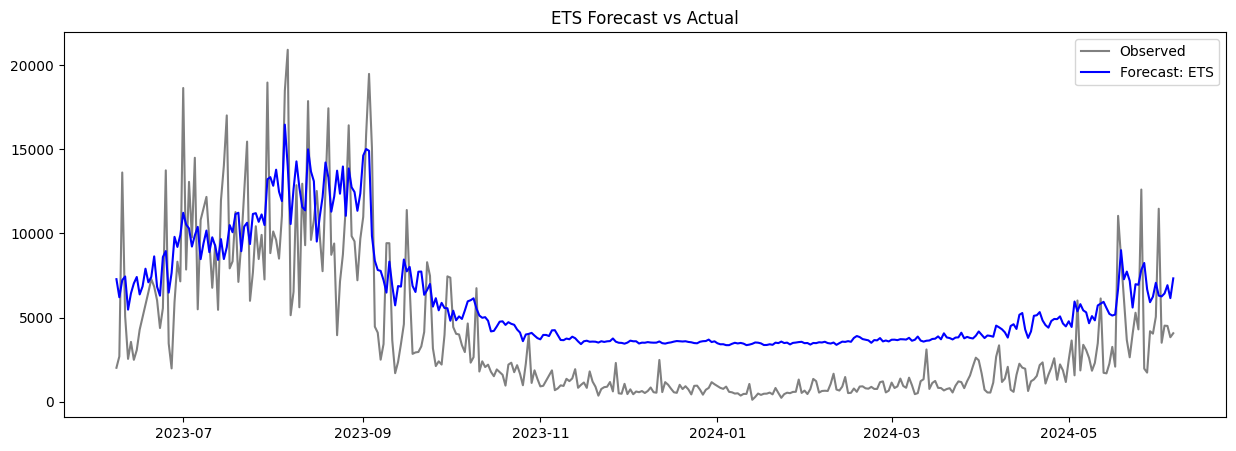

32653437.515783384
seasonal smoothing 0.9948508659178389


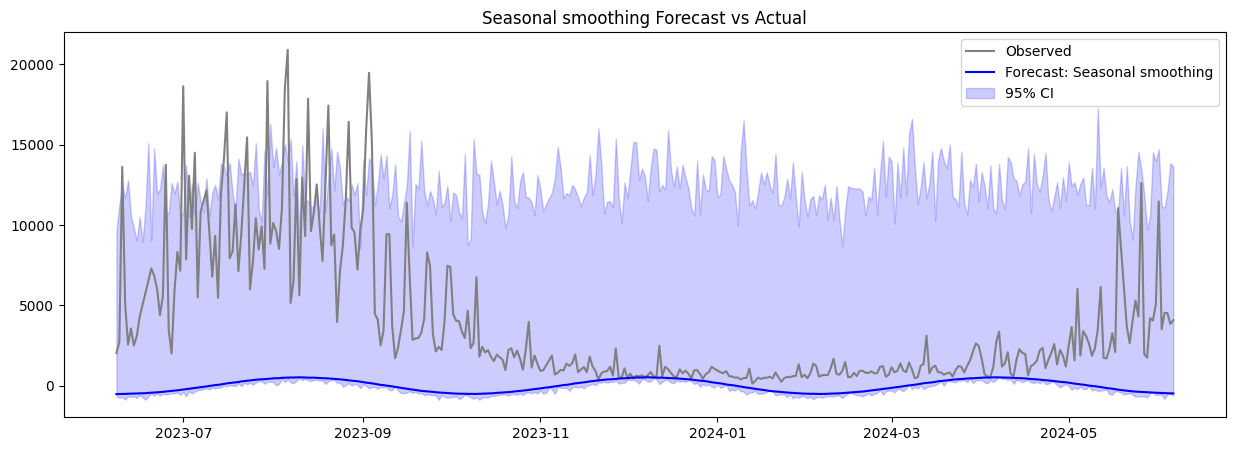

23:03:18 - cmdstanpy - INFO - Chain [1] start processing
23:03:18 - cmdstanpy - INFO - Chain [1] done processing


7137129.993993779
Prophet Season Holiday 0.9914446392519757


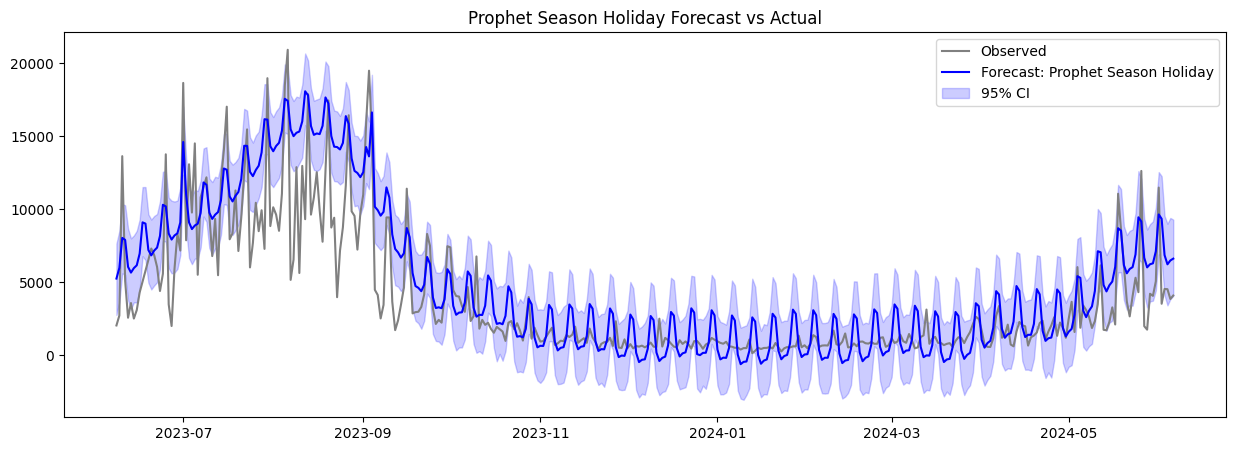

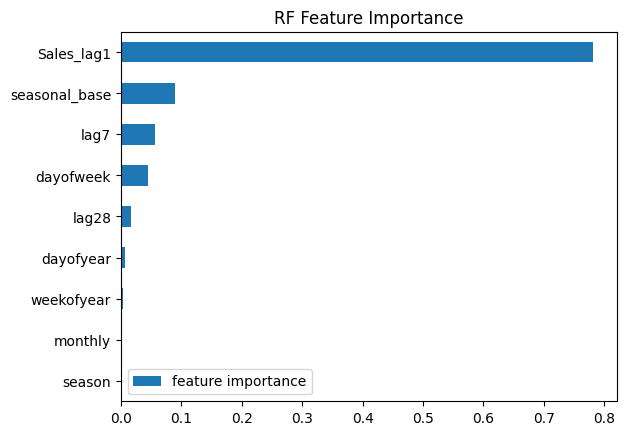

3673426.341794867
RF 0.3450898632722772


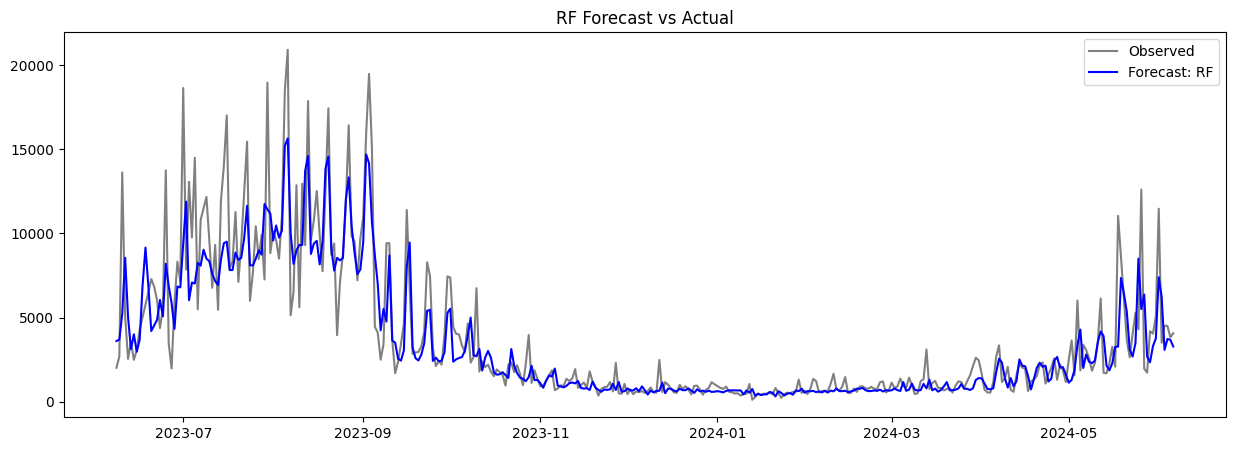

Index(['Sales_lag1', 'dayofweek', 'dayofyear', 'monthly', 'season',
       'weekofyear', 'seasonal_base', 'lag7', 'lag14', 'lag28', 'lag56',
       'lag_year'],
      dtype='object')


G:\Users\Fahim\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:03:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


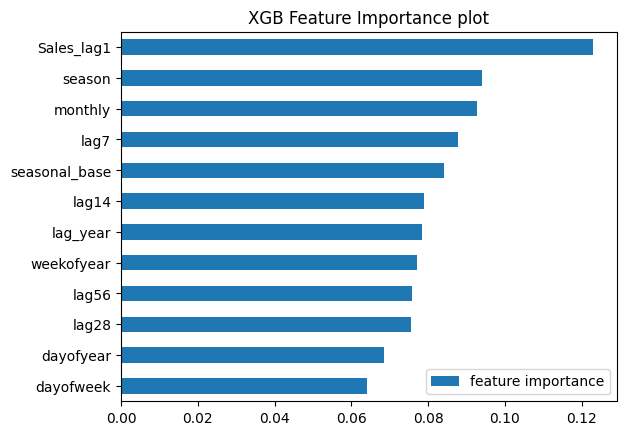

3934281.111389207
XGB 0.3508717613110877


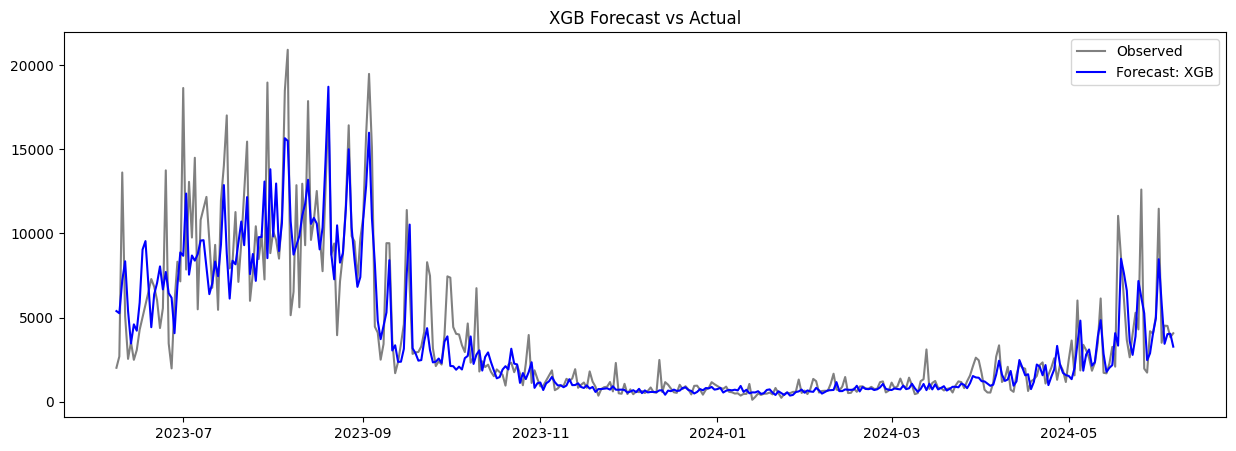

Index(['Sales_lag1', 'dayofweek', 'dayofyear', 'monthly', 'season',
       'weekofyear', 'seasonal_base', 'lag3', 'lag7', 'lag28'],
      dtype='object')
3660012.009517156
LGBM 0.34953904389357815


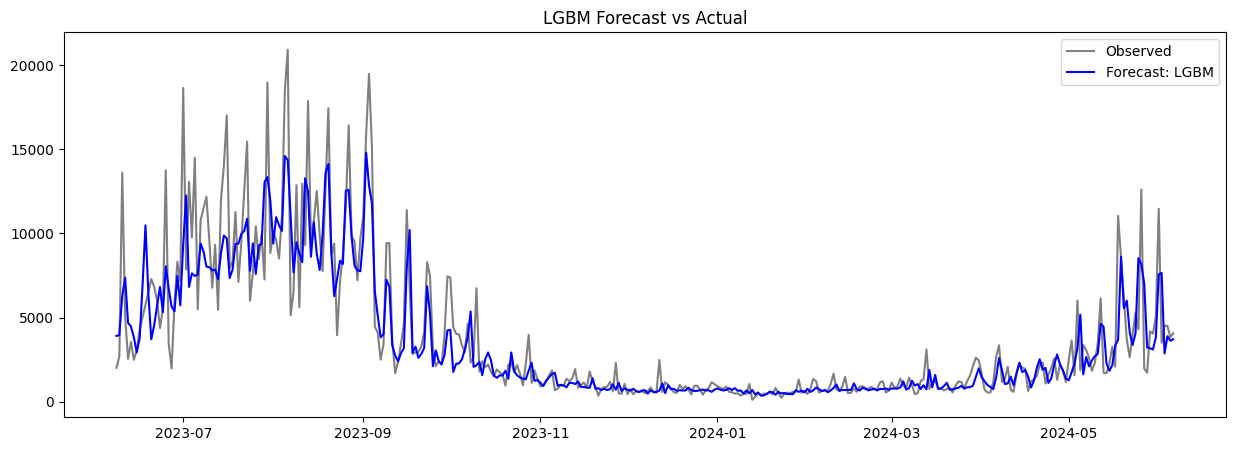

Index(['Sales_lag1', 'dayofweek', 'dayofyear', 'monthly', 'season',
       'weekofyear', 'seasonal_base', 'lag3', 'lag7', 'lag14', 'lag28',
       'lag30', 'lag56'],
      dtype='object')


G:\Users\Fahim\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:03:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


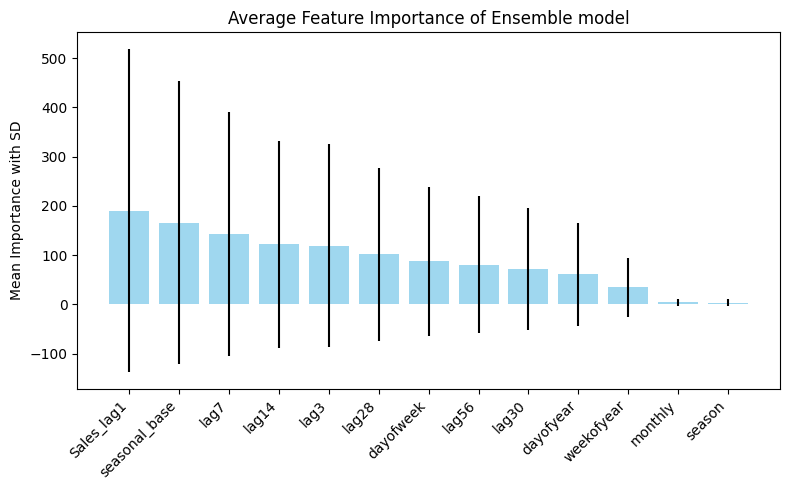

3516243.7153698048
Ensemble model 0.3483173559716234


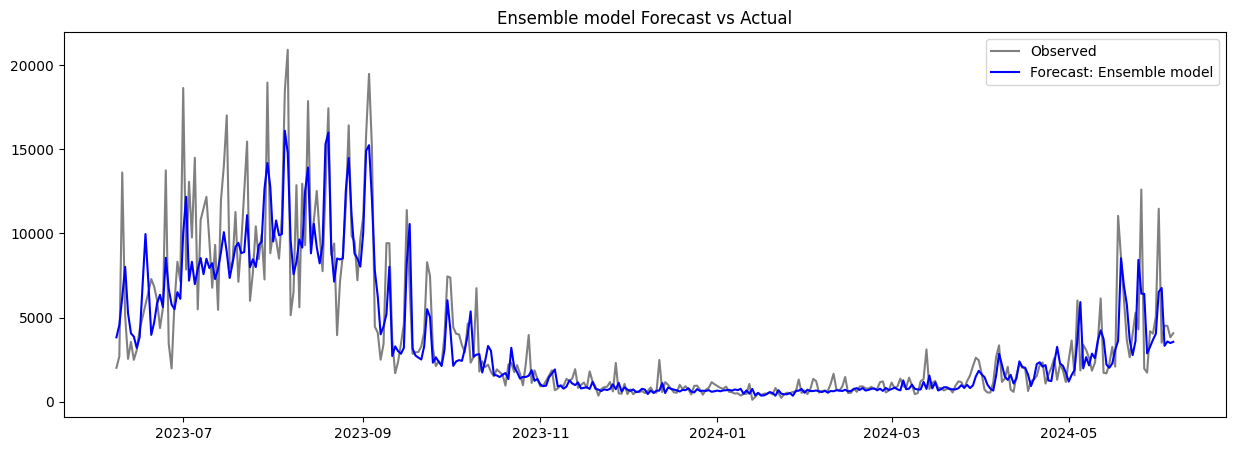

val shape (3325, 11) (365, 11)
13965866.266258333
Base 0.8560291889932509


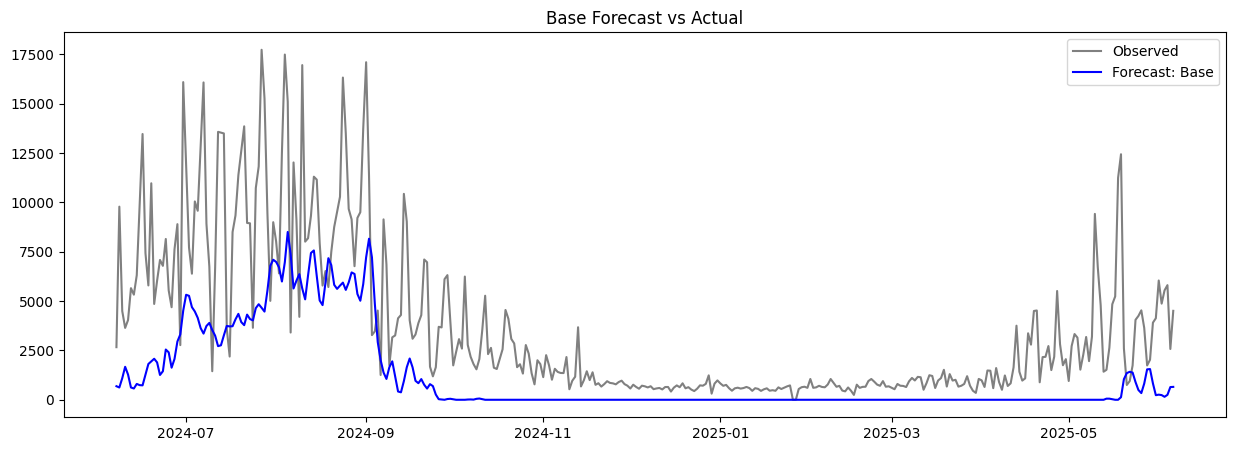

13592835.280780029
ARIMA 1.7707126648706335


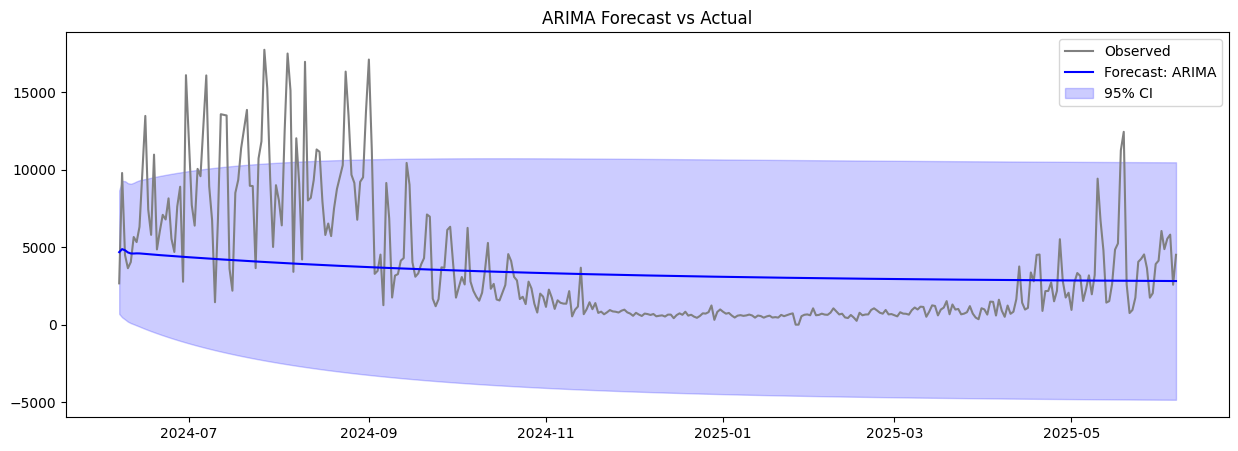

6542012.490385166
ETS 1.5252188302598553


G:\Users\Fahim\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


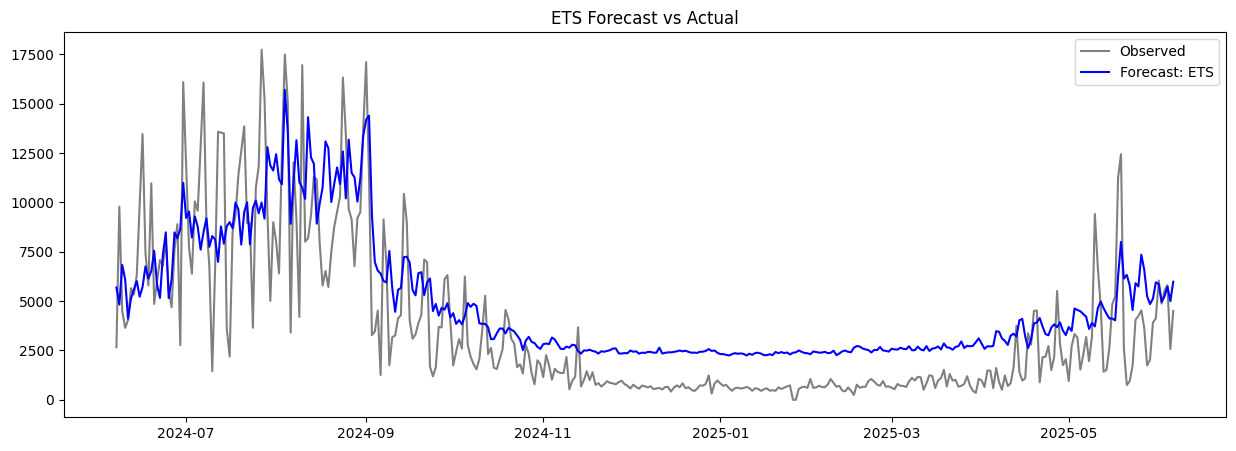

29101455.78568701
seasonal smoothing 0.9833249250158219


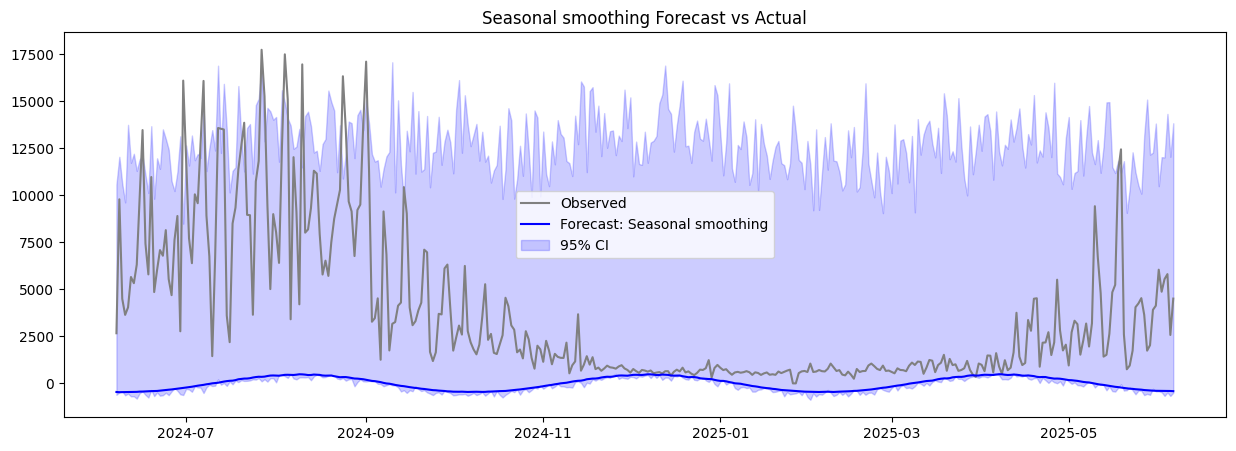

23:03:34 - cmdstanpy - INFO - Chain [1] start processing
23:03:34 - cmdstanpy - INFO - Chain [1] done processing


5529789.641782865
Prophet Season Holiday 0.9052138358549595


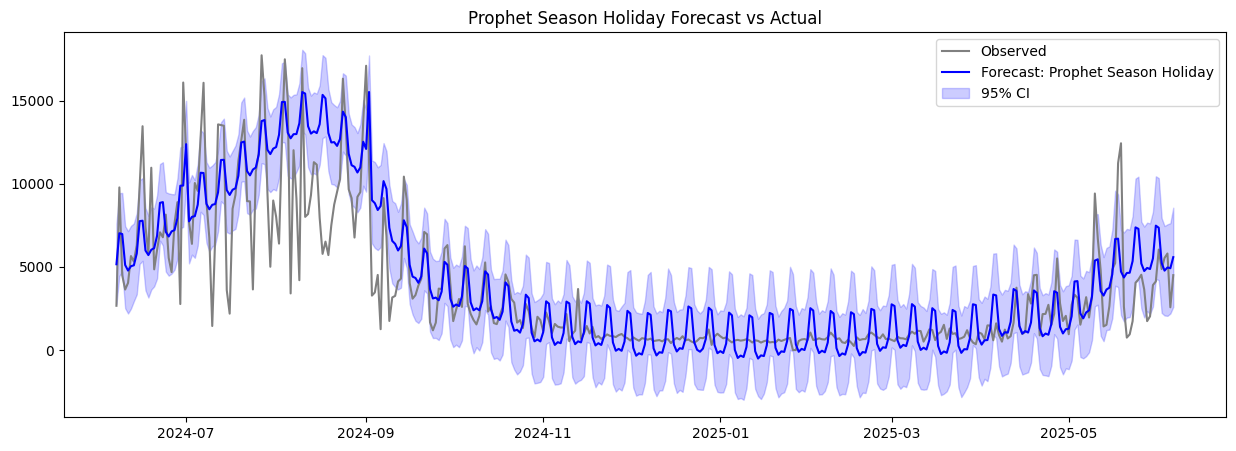

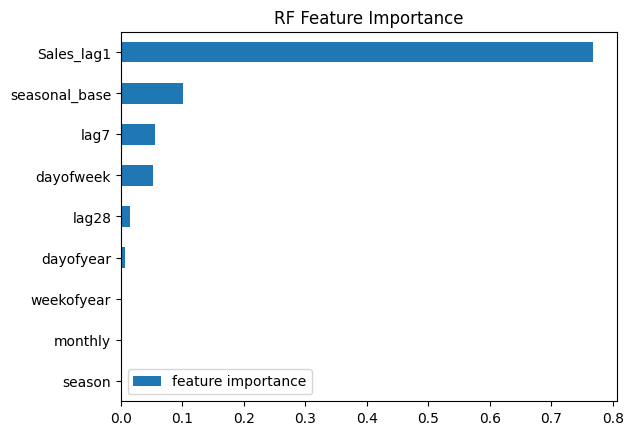

3564227.3832746837
RF 0.34111287606467866


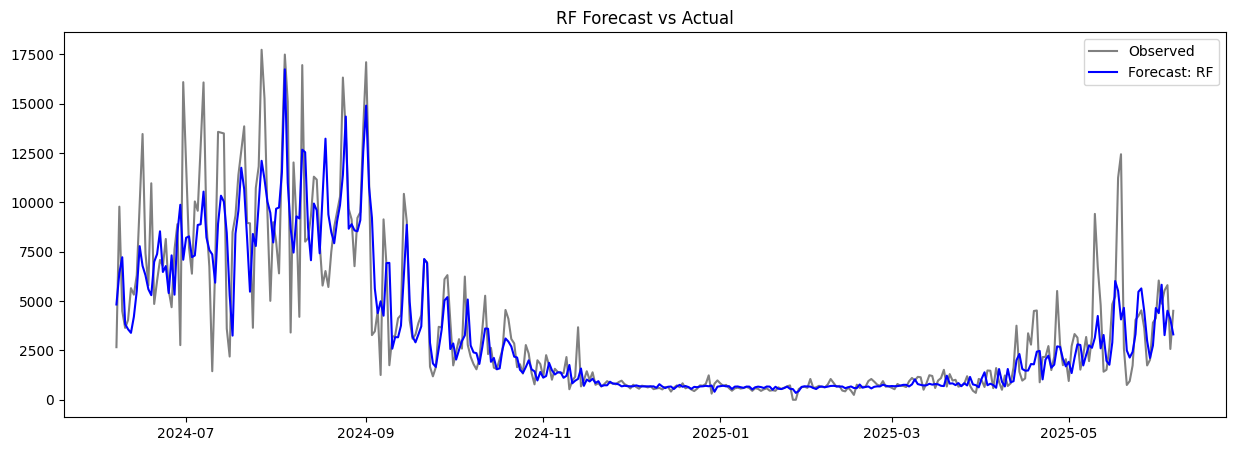

Index(['Sales_lag1', 'dayofweek', 'dayofyear', 'monthly', 'season',
       'weekofyear', 'seasonal_base', 'lag7', 'lag14', 'lag28', 'lag56',
       'lag_year'],
      dtype='object')


G:\Users\Fahim\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:03:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


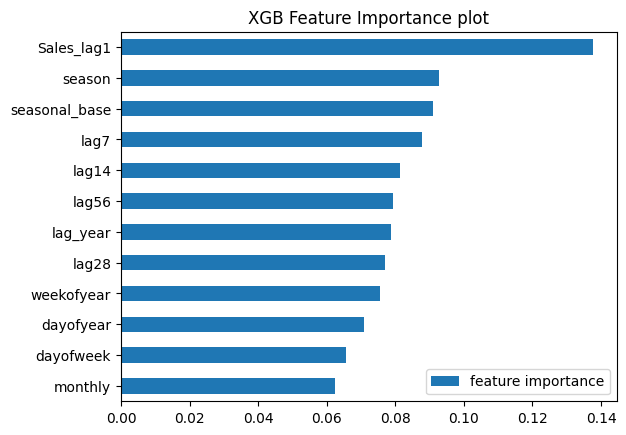

3541756.7839819575
XGB 0.3392294172573832


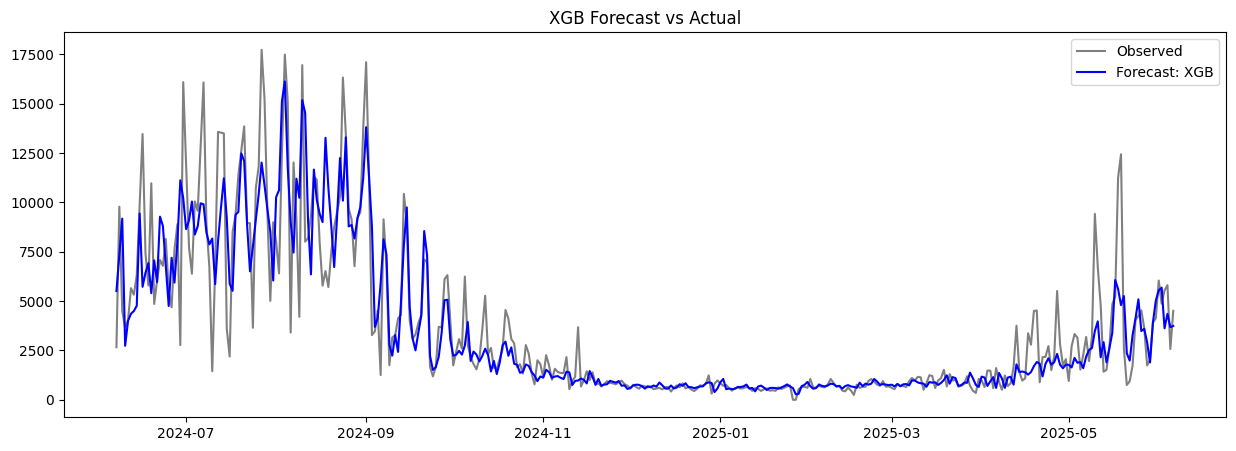

Index(['Sales_lag1', 'dayofweek', 'dayofyear', 'monthly', 'season',
       'weekofyear', 'seasonal_base', 'lag3', 'lag7', 'lag28'],
      dtype='object')
3349737.3706476092
LGBM 0.3374407571884746


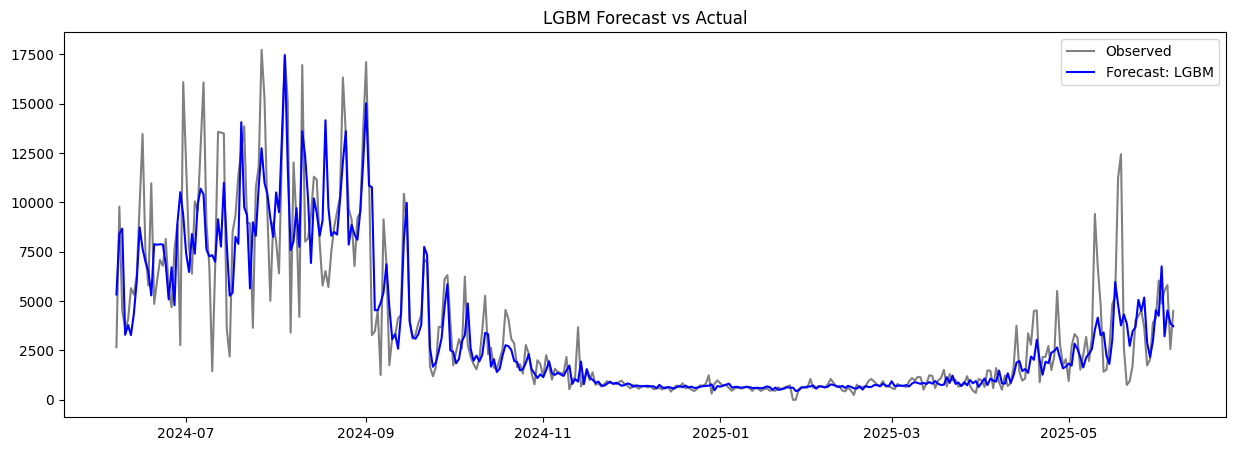

Index(['Sales_lag1', 'dayofweek', 'dayofyear', 'monthly', 'season',
       'weekofyear', 'seasonal_base', 'lag3', 'lag7', 'lag14', 'lag28',
       'lag30', 'lag56'],
      dtype='object')


G:\Users\Fahim\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:03:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


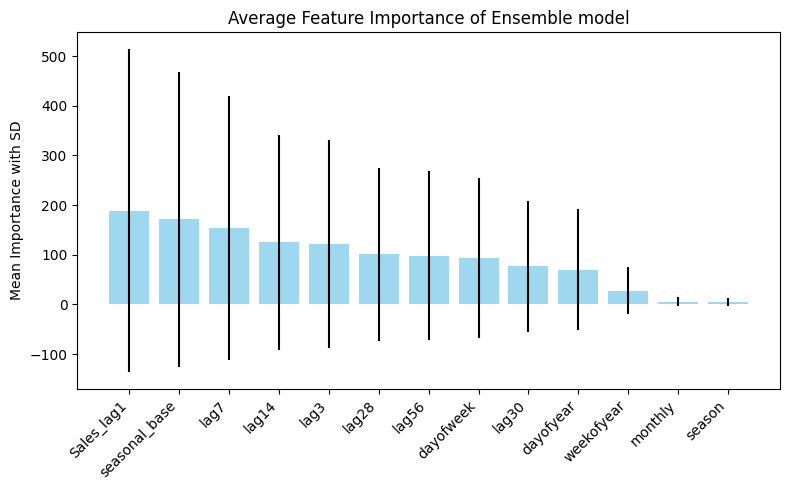

3561730.1417649062
Ensemble model 0.3398771561734463


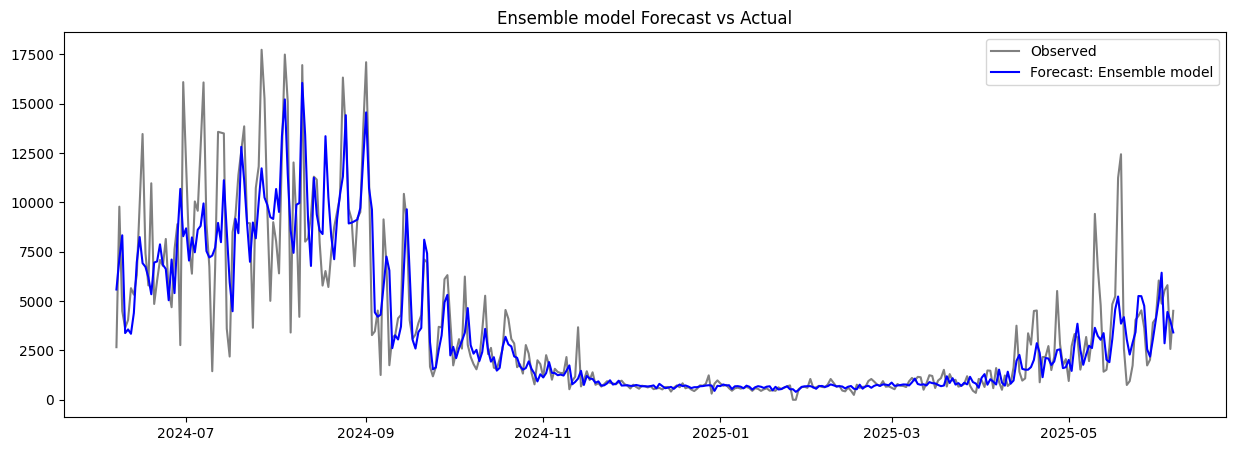

In [18]:
rm = RedemptionModel(df, 'Redemption Count')
rm.run_models()

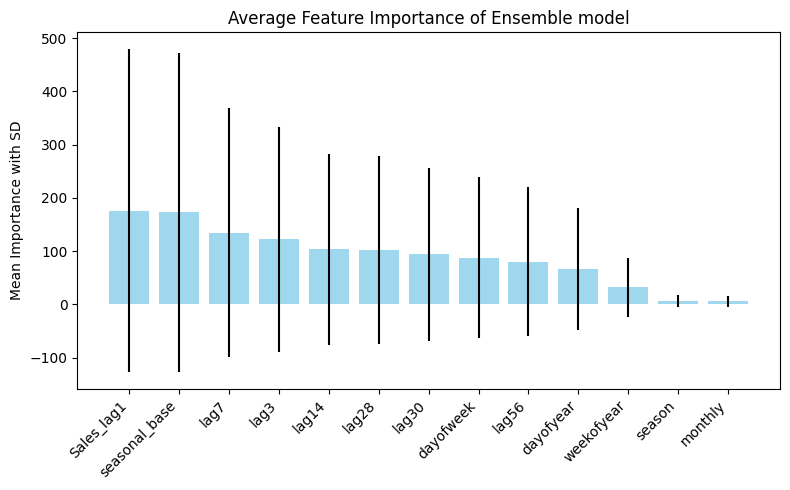

## score list

In [19]:
# print model summary stats
rm.results

{'Base': {0: 0.8645900694437079, 1: 0.8597226890214185, 2: 0.8560291889932509},
 'ARIMA': {0: 3.082557446593088, 1: 0.9116165938645038, 2: 1.7707126648706335},
 'ETS': {0: 1.4189199154850067, 1: 2.2534461450680707, 2: 1.5252188302598553},
 'seasonal smoothing': {0: 0.9994421296398169,
  1: 0.9948508659178389,
  2: 0.9833249250158219},
 'Prophet Season Holiday': {0: 0.9606301470090972,
  1: 0.9914446392519757,
  2: 0.9052138358549595},
 'RF': {0: 0.4202708771236588, 1: 0.3450898632722772, 2: 0.34111287606467866},
 'XGB': {0: 0.41555763260377077, 1: 0.3508717613110877, 2: 0.3392294172573832},
 'LGBM': {0: 0.41194757358325496,
  1: 0.34953904389357815,
  2: 0.3374407571884746},
 'Ensemble model': {0: 0.3997744138034158,
  1: 0.3483173559716234,
  2: 0.3398771561734463}}

## means of score across models

In [20]:
rm_means = {key: sum(values.values()) / len(values) for key, values in rm.results.items()}
print(rm_means)

{'Base': 0.8601139824861258, 'ARIMA': 1.921628901776075, 'ETS': 1.7325282969376443, 'seasonal smoothing': 0.992539306857826, 'Prophet Season Holiday': 0.952429540705344, 'RF': 0.3688245388202049, 'XGB': 0.36855293705741393, 'LGBM': 0.36630912488843587, 'Ensemble model': 0.36265630864949516}


In [21]:

for key,value in rm_means.items():
    print("Model : ",key," - Score :", round(value,3))

Model :  Base  - Score : 0.86
Model :  ARIMA  - Score : 1.922
Model :  ETS  - Score : 1.733
Model :  seasonal smoothing  - Score : 0.993
Model :  Prophet Season Holiday  - Score : 0.952
Model :  RF  - Score : 0.369
Model :  XGB  - Score : 0.369
Model :  LGBM  - Score : 0.366
Model :  Ensemble model  - Score : 0.363


## improve percentage

In [22]:
for key,value in rm_means.items():
    print("performance imporvement than base for ",key," model is ",round(((rm_means['Base']-value)/rm_means['Base'])*100,2),"%")

performance imporvement than base for  Base  model is  0.0 %
performance imporvement than base for  ARIMA  model is  -123.42 %
performance imporvement than base for  ETS  model is  -101.43 %
performance imporvement than base for  seasonal smoothing  model is  -15.4 %
performance imporvement than base for  Prophet Season Holiday  model is  -10.73 %
performance imporvement than base for  RF  model is  57.12 %
performance imporvement than base for  XGB  model is  57.15 %
performance imporvement than base for  LGBM  model is  57.41 %
performance imporvement than base for  Ensemble model  model is  57.84 %


# years

In [23]:
df['year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025],
      dtype=int64)

Sales count is about tickets sold

Redemption is about tickets scanned

The redemption rate helped us to analyze event turnout, success rate 